# Taiwan forest project 

## Loading the require libraries

In [83]:
library(tidyverse)
library(readr)
library(readxl)
library(vegan)
library(reshape2)
library(dplyr)
library(randomForest)
library(NbClust)
library(cluster)
library(factoextra)
library(dendextend)

## Loading the data

In [84]:
spe <- read_delim("MQU_spe.txt", delim = "\t")
env <- read_delim("MQU_env.txt", delim = "\t")
traits <- read_delim("MQU_traits.txt", delim = "\t")
loc <- loc <- read_delim("MQU_loc.txt", delim = "\t")

New names:
• `` -> `...1`
Rows: 9 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (89): Acer palmatum var. pubescens, Acer serrulatum, Ardisia quinquegona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Locality code
dbl (2): Elevation, pH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 89 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (5): SLA, LDMC, LT, LA, SSD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types =

## Data exploration

We visualize the first row of our data, and summarize their content to understand with what we are working

In [85]:

head(spe)  #importance value index (the higher the number, the more important in the site)
head(env)
head(traits)
head(loc)
summary(traits)
summary(env)

...1 Acer palmatum var. pubescens Acer serrulatum Ardisia quinquegona
1 M01  0                            0.00            4.94               
2 M02  0                            4.45            0.48               
3 M03  0                            0.00            0.18               
4 Q01  0                            0.00            0.00               
5 Q02  0                            0.00            0.00               
6 Q03  0                            0.00            0.00               
  Barthea barthei Blastus cochinchinensis Camellia brevistyla
1 0.00             9.49                   0.00               
2 0.00             0.49                   0.00               
3 0.00            21.31                   0.00               
4 0.16             0.00                   0.00               
5 0.00             0.00                   0.41               
6 0.00             0.00                   0.00               
  Camellia tenuifolia Castanopsis cuspidata var. carlesii
1 0                   4.16                               
2 0                   0.00                               
3 0                   0.92                               
4 0                   0.00                               
5 0                   0.00                               
6 0                   0.00                               
  Chamaecyparis obtusa var. formosana ⋯ Symplocos wikstroemiifolia
1 0.00                                ⋯ 0                         
2 0.00                                ⋯ 0                         
3 0.00                                ⋯ 0                         
4 0.17                                ⋯ 0                         
5 0.00                                ⋯ 0                         
6 0.00                                ⋯ 0                         
  Syzygium buxifolium Ternstroemia gymnanthera Tricalysia dubia
1  0.00               0.00                     0.42            
2  0.00               0.00                     2.48            
3  0.00               0.00                     0.00            
4 12.37               0.00                     0.00            
5  0.00               1.53                     0.00            
6  0.00               0.32                     0.00            
  Trochodendron aralioides Turpinia formosana Vaccinium randaiense
1 0.00                     0.00               0.0                 
2 0.00                     3.03               0.0                 
3 0.00                     0.00               0.0                 
4 0.00                     0.00               3.1                 
5 0.00                     0.00               0.2                 
6 0.32                     0.00               0.0                 
  Viburnum foetidum var. rectangulatum Viburnum integrifolium
1 0.00                                 0.00                  
2 0.00                                 0.00                  
3 0.00                                 0.00                  
4 0.00                                 0.00                  
5 0.00                                 0.00                  
6 1.93                                 0.32                  
  Viburnum taitoense
1 0.00              
2 0.00              
3 0.00              
4 0.00              
5 5.36              
6 0.63

Locality code Elevation pH 
1 M01            794      3.8
2 M02            947      4.1
3 M03            868      3.0
4 Q01           1343      3.5
5 Q02           1606      3.0
6 Q03           1571      3.4

Species                      SLA  LDMC  LT   LA   SSD 
1 Acer palmatum var. pubescens 22.0 427.3 0.14 1785 0.61
2 Acer serrulatum              19.1 446.6 0.15 2534 0.61
3 Ardisia quinquegona          11.3 423.1 0.21 1428 0.60
4 Barthea barthei              20.8 301.6 0.28 1504 0.54
5 Blastus cochinchinensis      31.7 267.8 0.19 3628 0.50
6 Camellia brevistyla          10.3 409.4 0.32  796 0.57

Locality code Locality name     Date of vegetation sampling Latitude
1 M01           Luen-Pi-Chi       9/13/2014                   24.70344
2 M02           Nan-Cha-Tien Shan 11/4/2014                   24.77967
3 M03           Wu-Lai_Fu-Shan    11/19/2014                  24.78294
4 Q01           Fu-Sin-Jien I     9/16/2014                   24.64919
5 Q02           Fu-Sin-Jien II    9/28/2014                   24.65611
6 Q03           Fu-Fu-Shan        10/14/2014                  24.72600
  Longitude
1 121.5912 
2 121.4116 
3 121.4828 
4 121.4356 
5 121.4338 
6 121.3916

   Species               SLA             LDMC             LT       
 Length:89          Min.   : 5.60   Min.   :267.8   Min.   :0.140  
 Class :character   1st Qu.: 9.80   1st Qu.:350.0   1st Qu.:0.250  
 Mode  :character   Median :11.60   Median :405.8   Median :0.300  
                    Mean   :12.72   Mean   :404.2   Mean   :0.318  
                    3rd Qu.:15.10   3rd Qu.:461.6   3rd Qu.:0.350  
                    Max.   :31.70   Max.   :545.2   Max.   :0.710  
       LA             SSD        
 Min.   :  373   Min.   :0.3500  
 1st Qu.: 1226   1st Qu.:0.5100  
 Median : 1939   Median :0.5500  
 Mean   : 2939   Mean   :0.5599  
 3rd Qu.: 2837   3rd Qu.:0.6100  
 Max.   :55524   Max.   :0.7900  

 Locality code        Elevation          pH     
 Length:9           Min.   : 794   Min.   :2.8  
 Class :character   1st Qu.: 947   1st Qu.:3.0  
 Mode  :character   Median :1571   Median :3.2  
                    Mean   :1447   Mean   :3.3  
                    3rd Qu.:1890   3rd Qu.:3.5  
                    Max.   :2082   Max.   :4.1  

Checking the dimension of our data

In [86]:
# dimension
dim(spe)
dim(env)
dim(traits)
dim(loc)

[1]  9 90

[1] 9 3

[1] 89  6

[1] 9 5

We give the same name to every column containing the site name (we rename it site in our datasets)

In [87]:
# modify name of location by site
spe <- spe %>% 
  rename(site = `...1`)

env <- env %>%
  rename(site = `Locality code`)

loc <- loc %>%
  rename(site = `Locality code`)

In [88]:
spe$site
env$site
loc$site

[1] "M01" "M02" "M03" "Q01" "Q02" "Q03" "U01" "U02" "U03"

[1] "M01" "M02" "M03" "Q01" "Q02" "Q03" "U01" "U02" "U03"

[1] "M01" "M02" "M03" "Q01" "Q02" "Q03" "U01" "U02" "U03"

In [89]:
# richness site
specnumber(spe[,-1])

[1] 19 28 30 29 26 27 30 17 20

In [90]:
# cover by site
rowSums(spe[,-1])

[1] 90.01 90.68 82.90 96.67 96.32 96.33 97.99 85.70 97.04

## Visualization

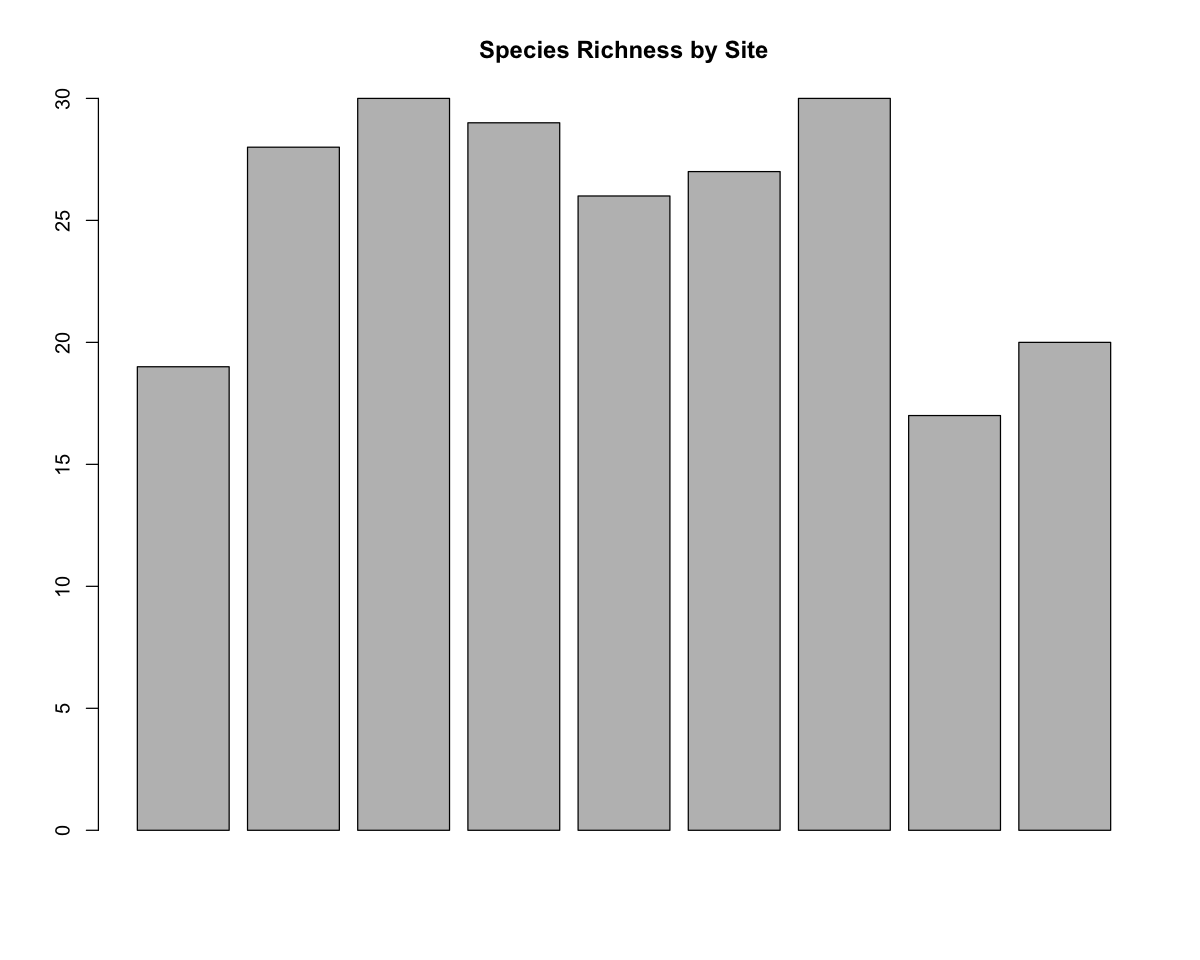

In [91]:
#richness per site
richness <- specnumber(spe[,-1])

barplot(richness, main="Species Richness by Site")

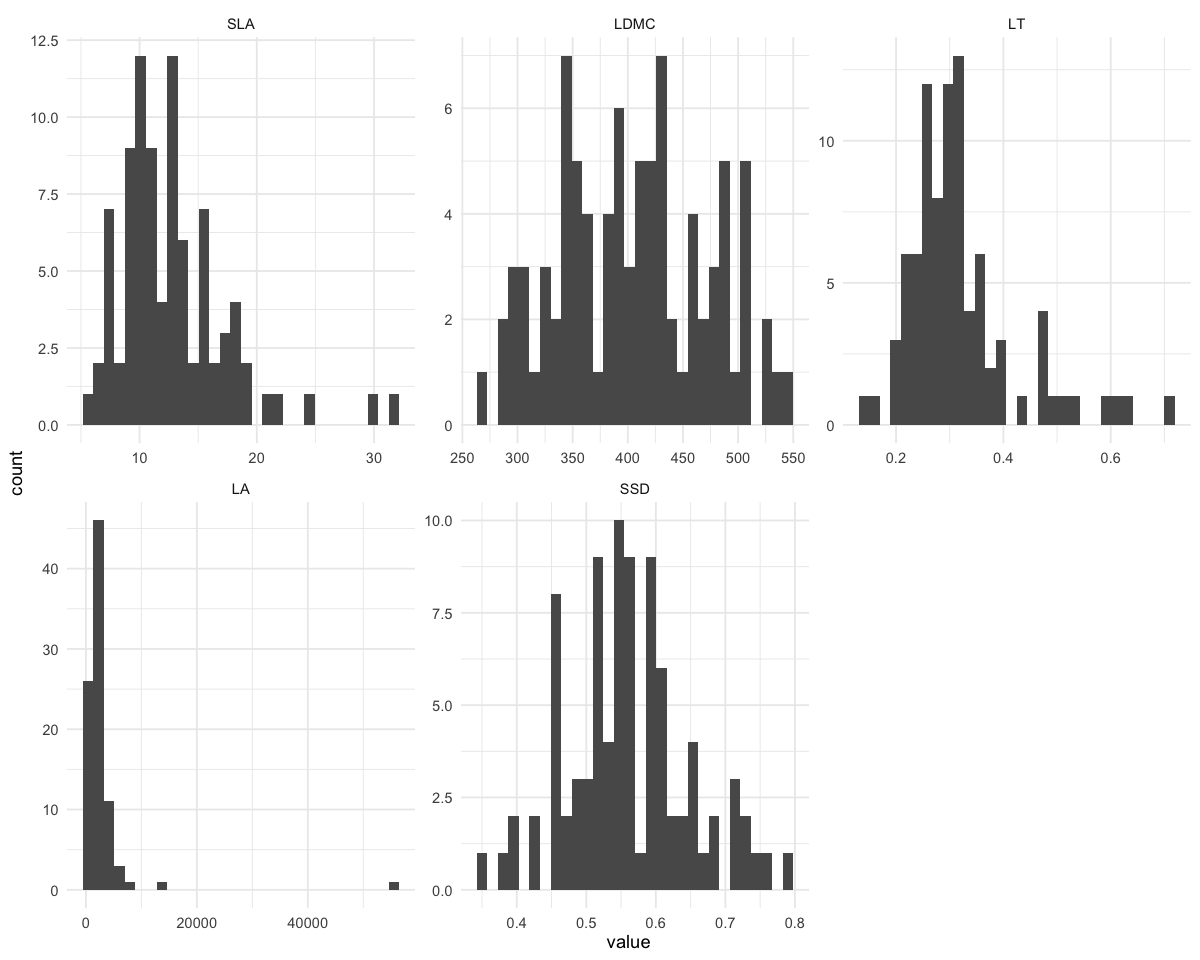

In [92]:
# traits distribution
traits_long <- melt(traits, id.vars = "Species")

ggplot(traits_long, aes(value)) +
  geom_histogram(bins = 30) +
  facet_wrap(~variable, scales = "free") +
  theme_minimal()

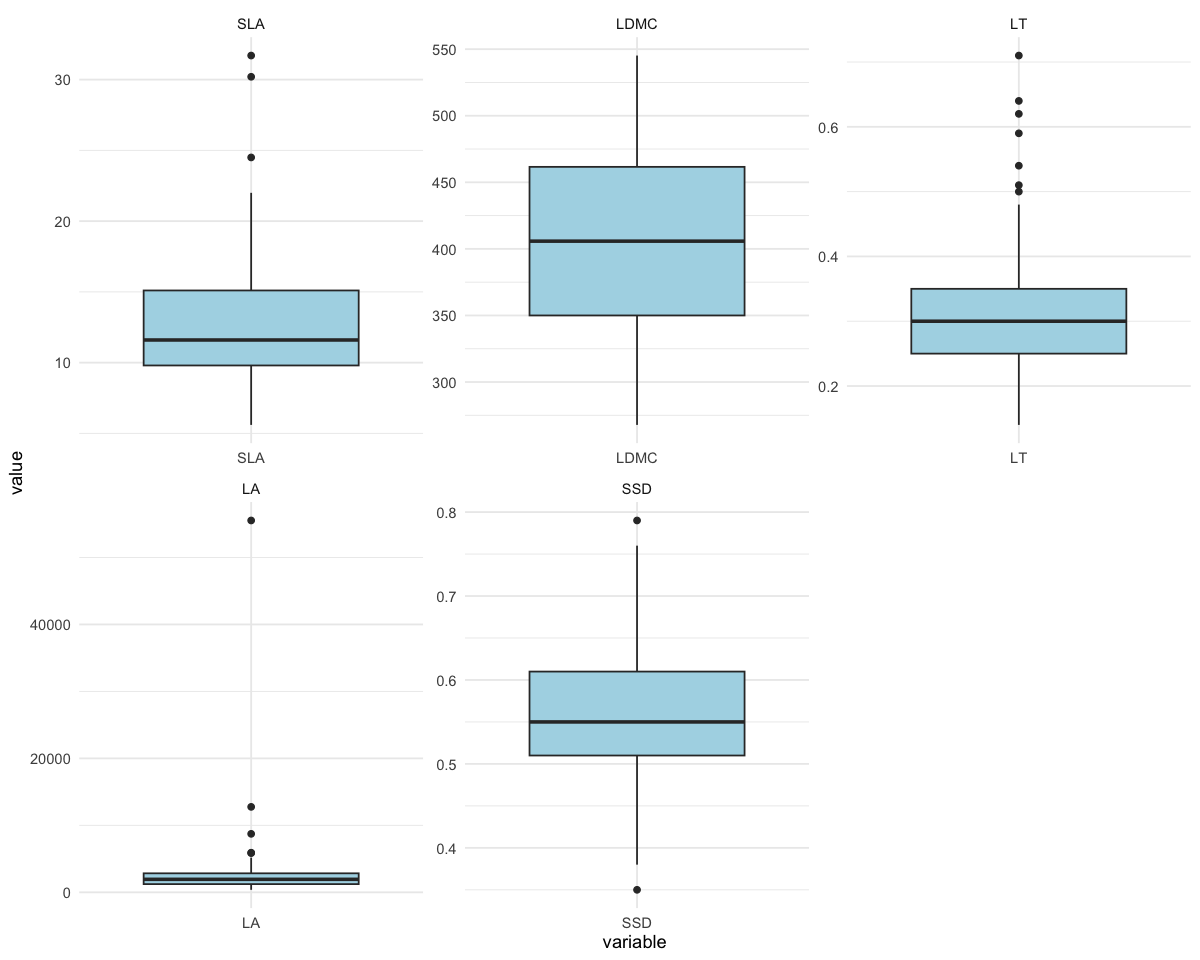

In [93]:
# boxplot traits
ggplot(traits_long, aes(x=variable, y=value)) +
  geom_boxplot(fill="lightblue") +
  facet_wrap(~variable, scales="free") +
  theme_minimal()

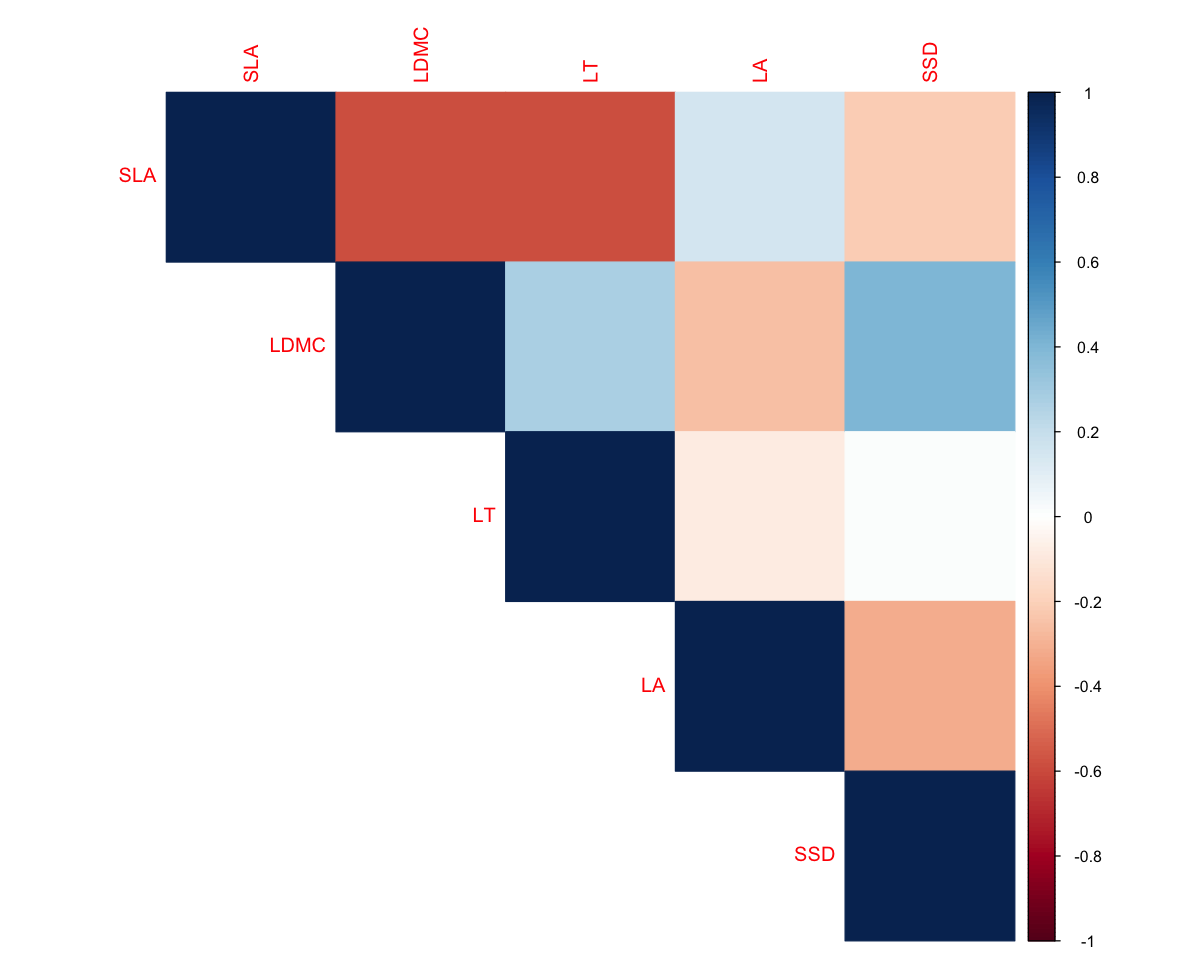

In [94]:
# traits correlation
cor_mat <- cor(traits[,2:6])
corrplot::corrplot(cor_mat, method="color", type="upper")

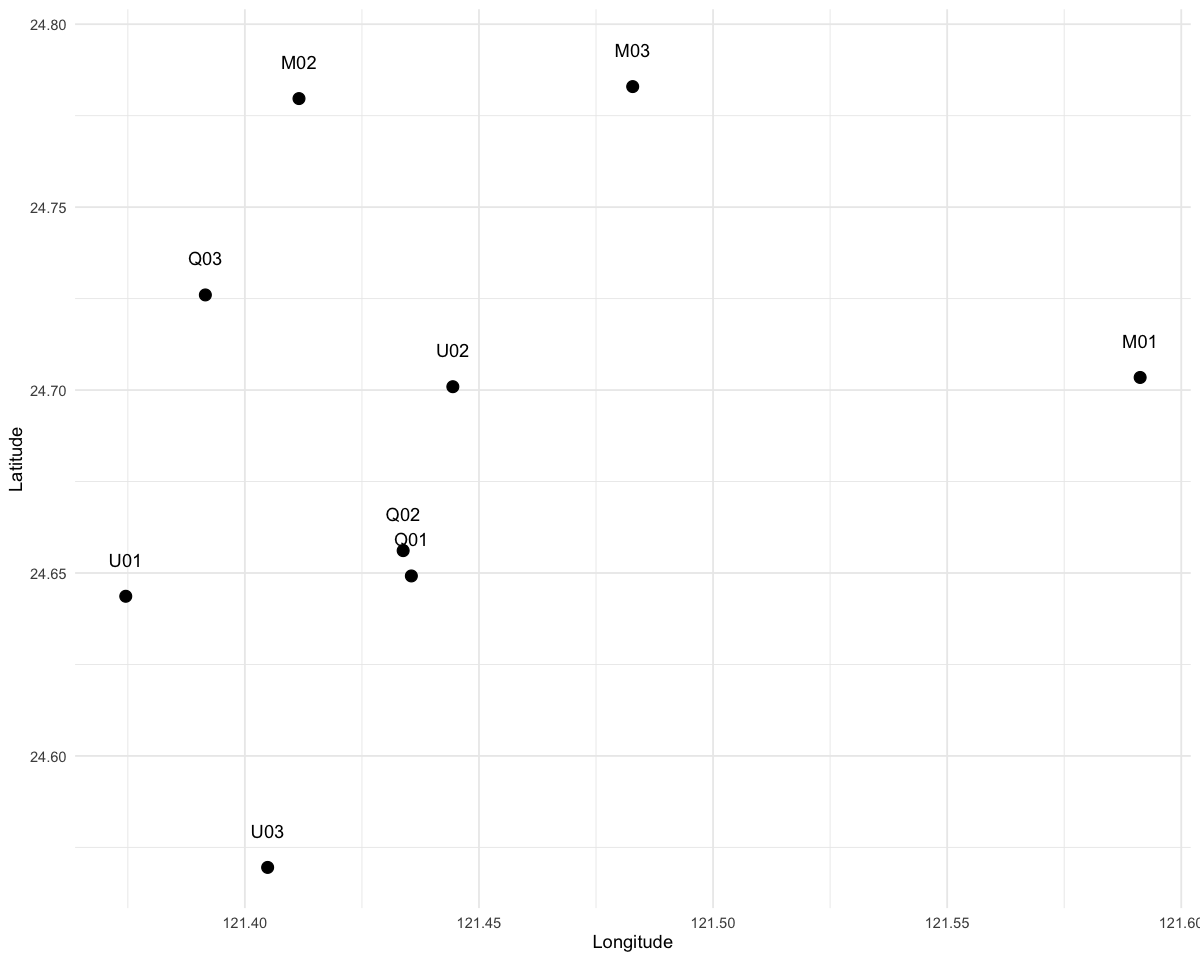

In [95]:
# environment vs site
ggplot(loc, aes(Longitude, Latitude)) +
  geom_point(size=3) +
  geom_text(aes(label=site), nudge_y=0.01) +
  theme_minimal()

## Clustering

### Clustering between traits and species

                                          Acer palmatum var. pubescens
Acer serrulatum                                           0.0606703018
Ardisia quinquegona                                       0.0532592140
Barthea barthei                                           0.0370836417
Blastus cochinchinensis                                   0.1611308212
Camellia brevistyla                                       0.2394850582
Camellia tenuifolia                                       0.2222979911
Castanopsis cuspidata var. carlesii                       0.0212525823
Chamaecyparis obtusa var. formosana                       0.3119316029
Cinnamomum kanehirae                                      0.1486185066
Cinnamomum subavenium                                     0.2165593432
Cleyera japonica var. longicarpa                          0.0408462753
Cleyera japonica var. taipinensis                         0.0267731288
Cryptocarya chinensis                                     0.0792081624
Cyclob

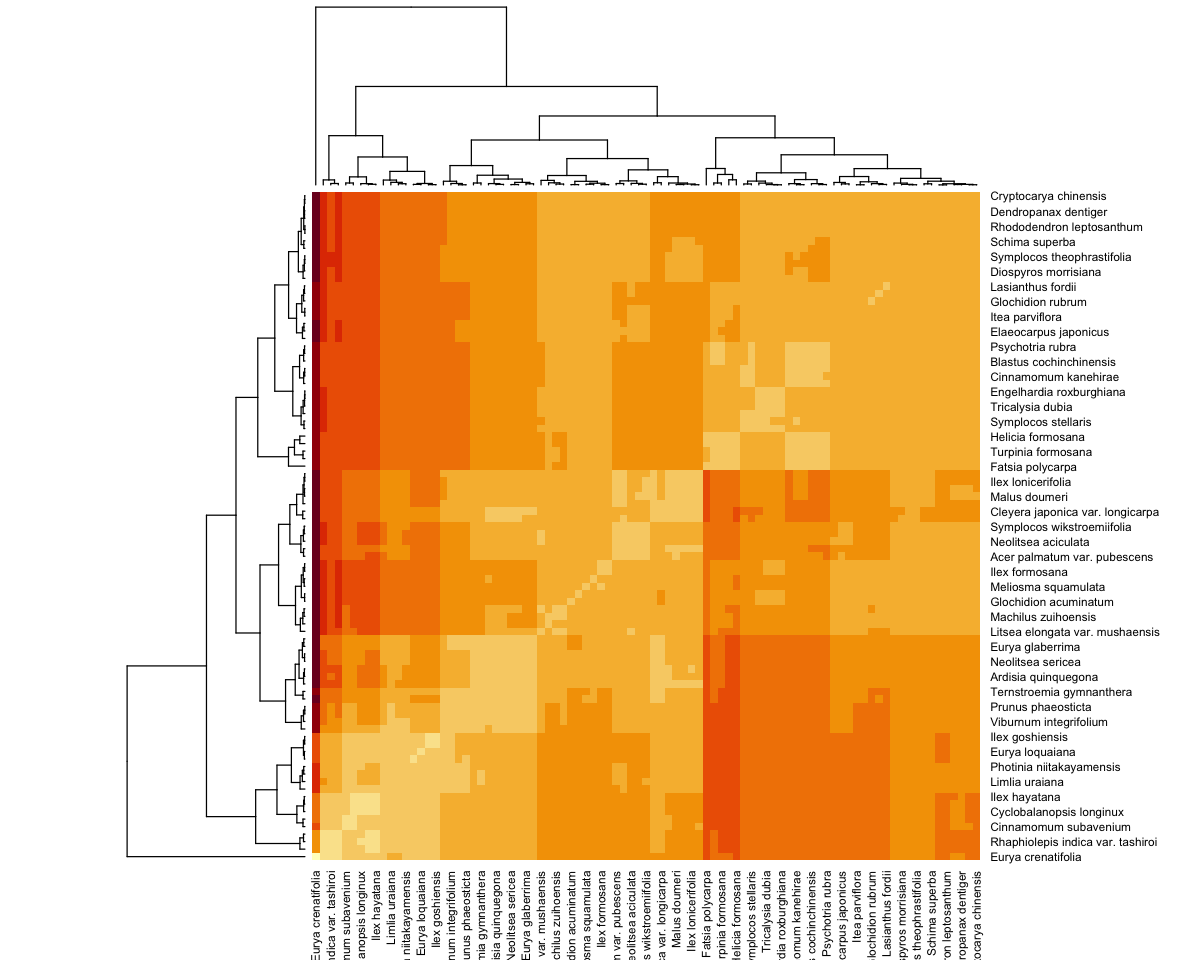

In [96]:
# Create distance matrix from normalized traits
# First, prepare the traits data (remove non-numeric columns if any)
traits.numeric <- traits %>% 
  column_to_rownames(var = colnames(traits)[1]) %>%  # Set first column as row names
  as.data.frame()

# Normalize the traits
traits.norm <- decostand(traits.numeric, "normalize")

# Calculate the distance matrix from normalized traits
traits.ch <- vegdist(traits.norm, "euc")  # Euclidean distance of normalized traits
traits.ch

options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(traits.ch))

#### We compute the different hierarchical clustering method

In [97]:
# Compute single linkage agglomerative clustering
traits.ch.single <- hclust(traits.ch, method = "single") 

# Compute and plot complete-linkage agglomerative clustering
traits.ch.complete <- hclust(traits.ch, method = "complete") 

# Compute and plot UPGMA agglomerative clustering (average linkage)
traits.ch.UPGMA <- hclust(traits.ch, method = "average")

# Compute and plot UPGMC agglomerative clustering (centroid linkage)
traits.ch.centroid <- hclust(traits.ch, method = "centroid") 

# Compute and plot median agglomerative clustering 
traits.ch.median <- hclust(traits.ch, method = "median") 

# Compute and plot Ward's minimum variance agglomerative clustering (hint Ward's minimum variance is called with "ward.D2" )
traits.ch.ward <- hclust(traits.ch, method = "ward.D2") 

#### Visualisation of the dendogram for each clustering method

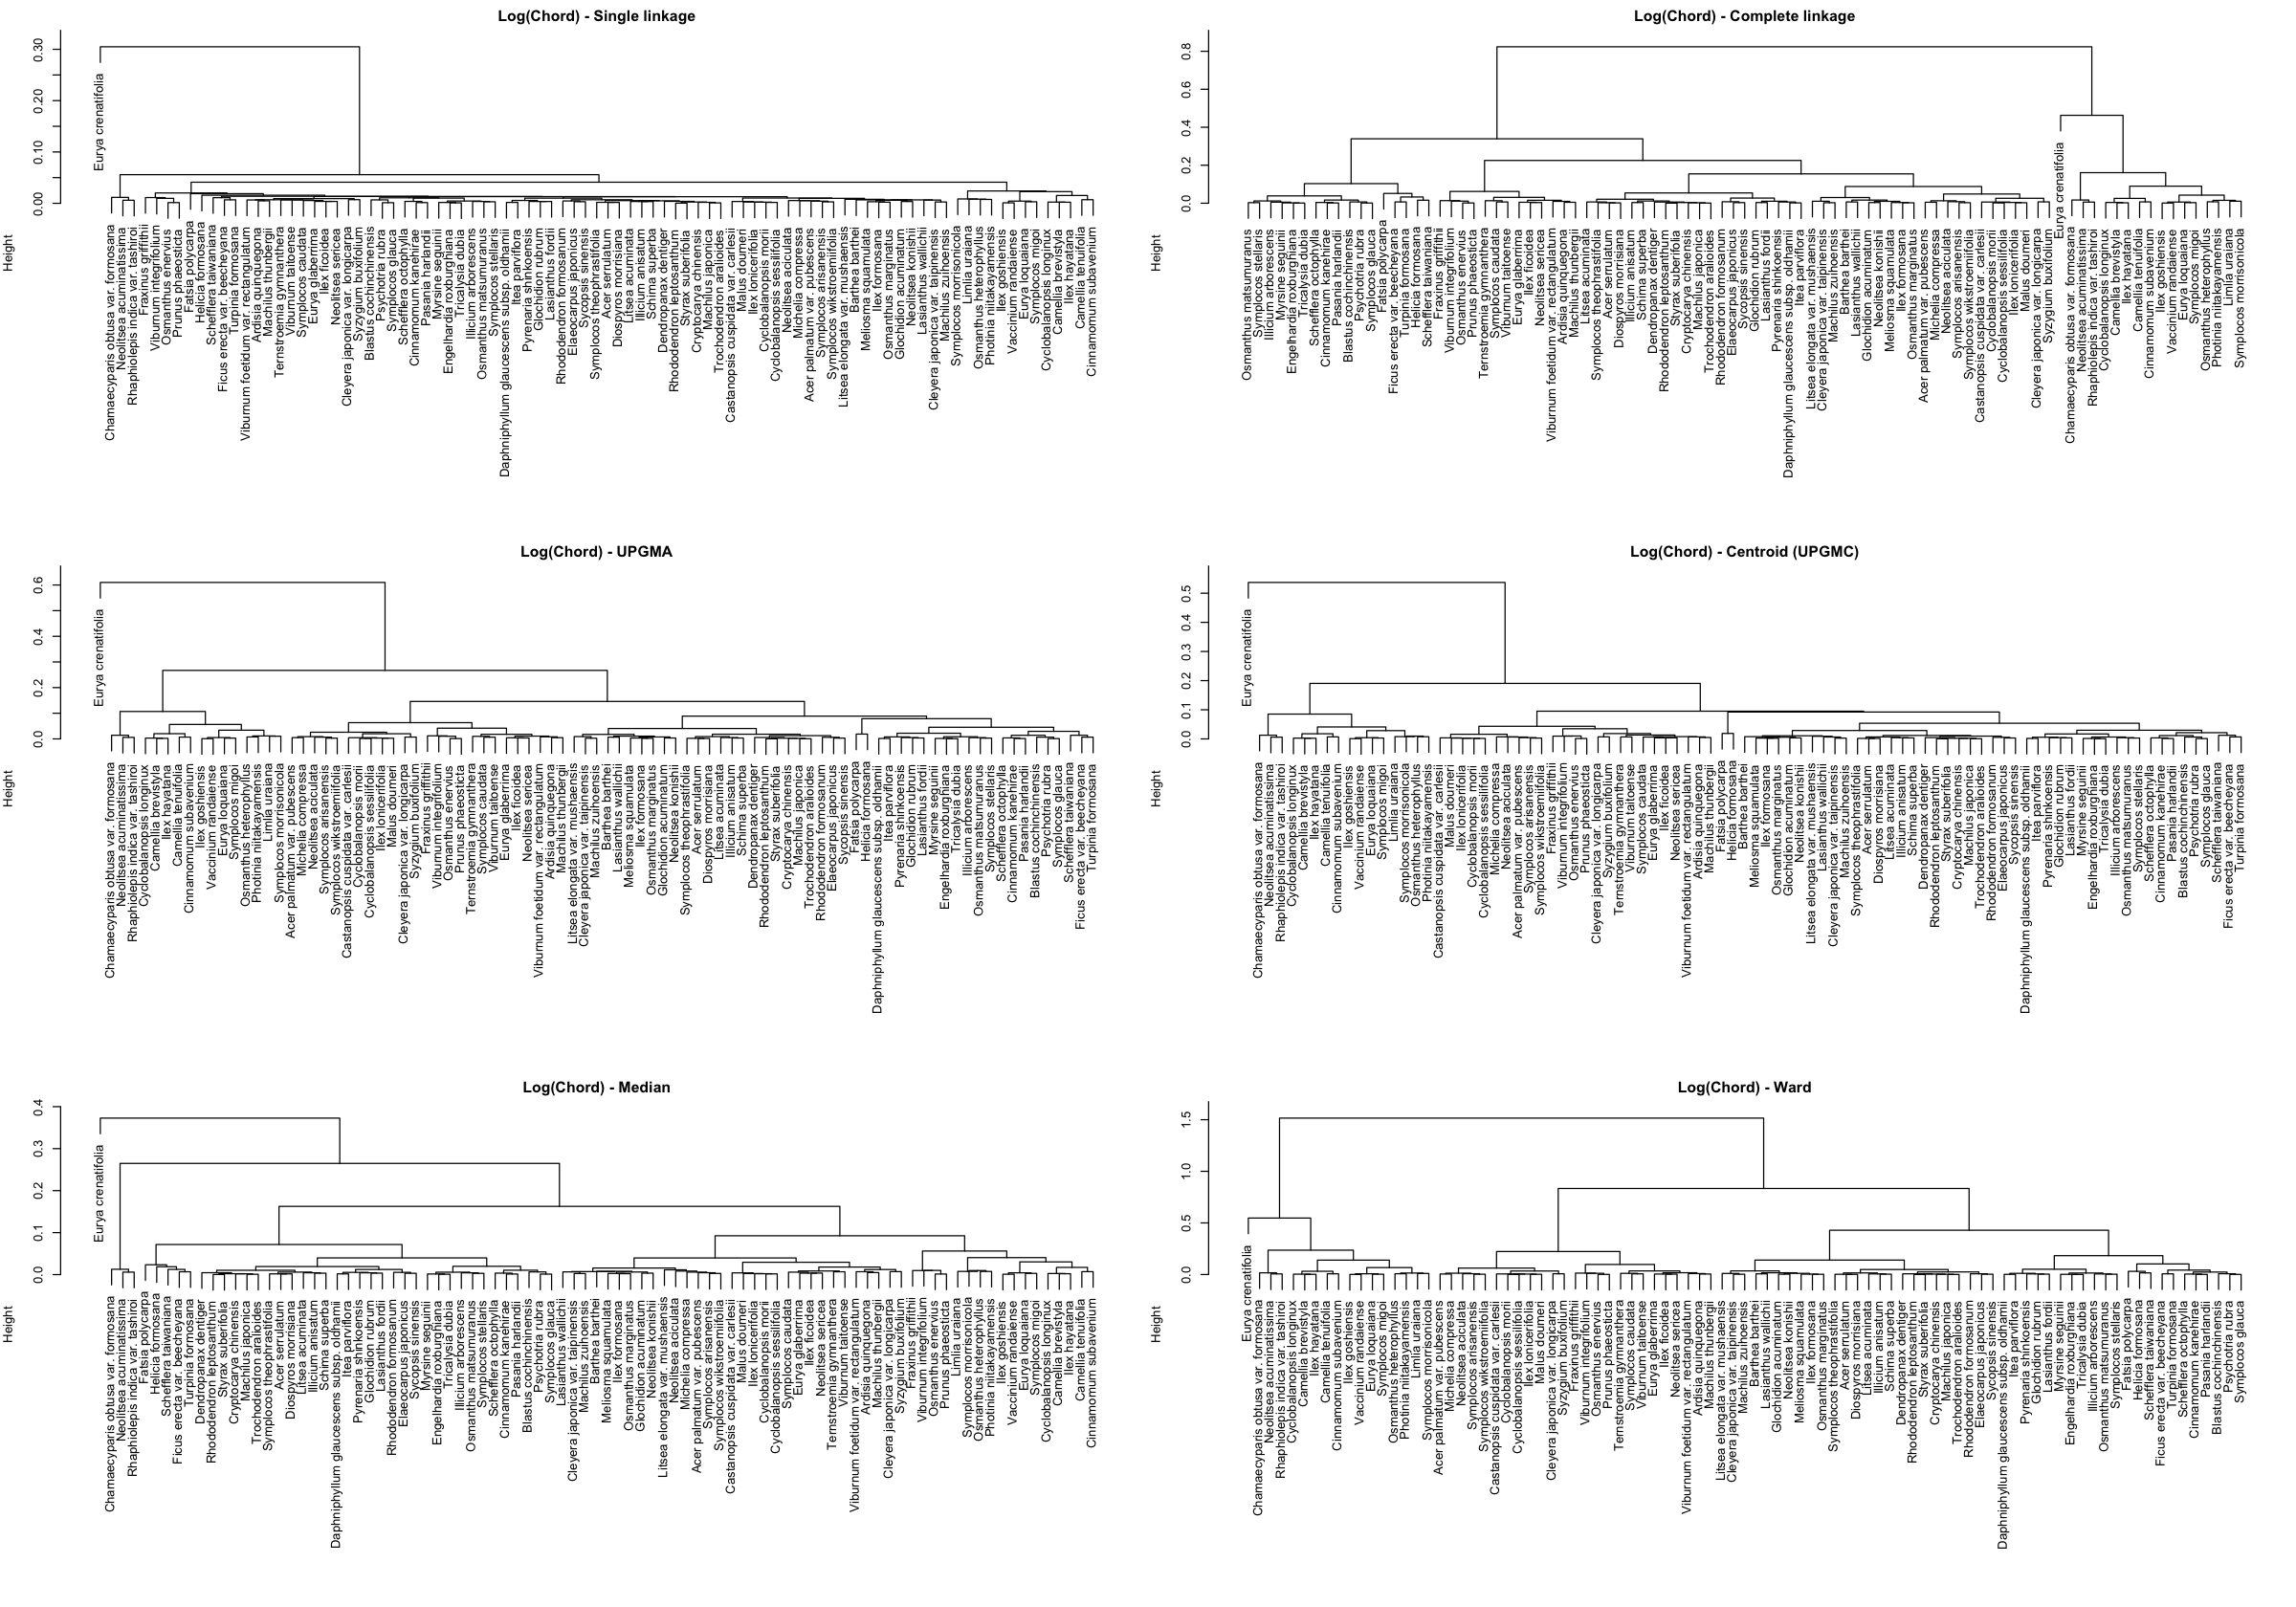

In [98]:
# Set plot size in Jupyter Notebook (20 x 14 inches)
options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))  # 3 rows, 2 columns

# --- Clustering on chord distances (log-transformed data) ---

# Single linkage
plot(traits.ch.single, main = "Log(Chord) - Single linkage", xlab="")

# Complete linkage
plot(traits.ch.complete, main = "Log(Chord) - Complete linkage", xlab="")

# UPGMA (average linkage)
plot(traits.ch.UPGMA, main = "Log(Chord) - UPGMA", xlab="")

# UPGMC (centroid linkage)
plot(traits.ch.centroid, main = "Log(Chord) - Centroid (UPGMC)", xlab="")

# Median
plot(traits.ch.median, main = "Log(Chord) - Median", xlab="")

# Ward's method
plot(traits.ch.ward, main = "Log(Chord) - Ward", xlab="")

#### We compute the cophenetic correlation for each method

In [99]:
# Create a list containing different clustering objects
clustering_list <- list(
  traits.ch.single,
  traits.ch.complete,
  traits.ch.UPGMA,
  traits.ch.centroid,
  traits.ch.median,
  traits.ch.ward
)

# Create a list containing different clustering method's name
clustering_name <- list(
  "single",
  "complete",
  "Average",
  "Centroid",
  "Median",
  "Ward"
)


# Loop over indices from 1 to the length of clustering_list
for (i in 1:length(clustering_list)) {

   # Get the clustering object at position i in the list 
  clustering_obj <- clustering_list[[i]]

   # Compute the cophenetic distance matrix for this clustering object 
  cophenetic_dist <- cophenetic(clustering_obj) # (hint : use cophenetic() )

  # Calculate the correlation between the cophenetic distances and the reference distance matrix  
  cophenetic_cor <- cor(cophenetic_dist, traits.ch) 

   # Print the clustering method name and its corresponding correlation value 
  cat(clustering_name[[i]], ": ", cophenetic_cor, "\n")
}

single :  0.7058662 
complete :  0.7465238 
Average :  0.8527718 
Centroid :  0.845396 
Median :  0.7537758 
Ward :  0.7466762 


#### Shepard diagram for each method

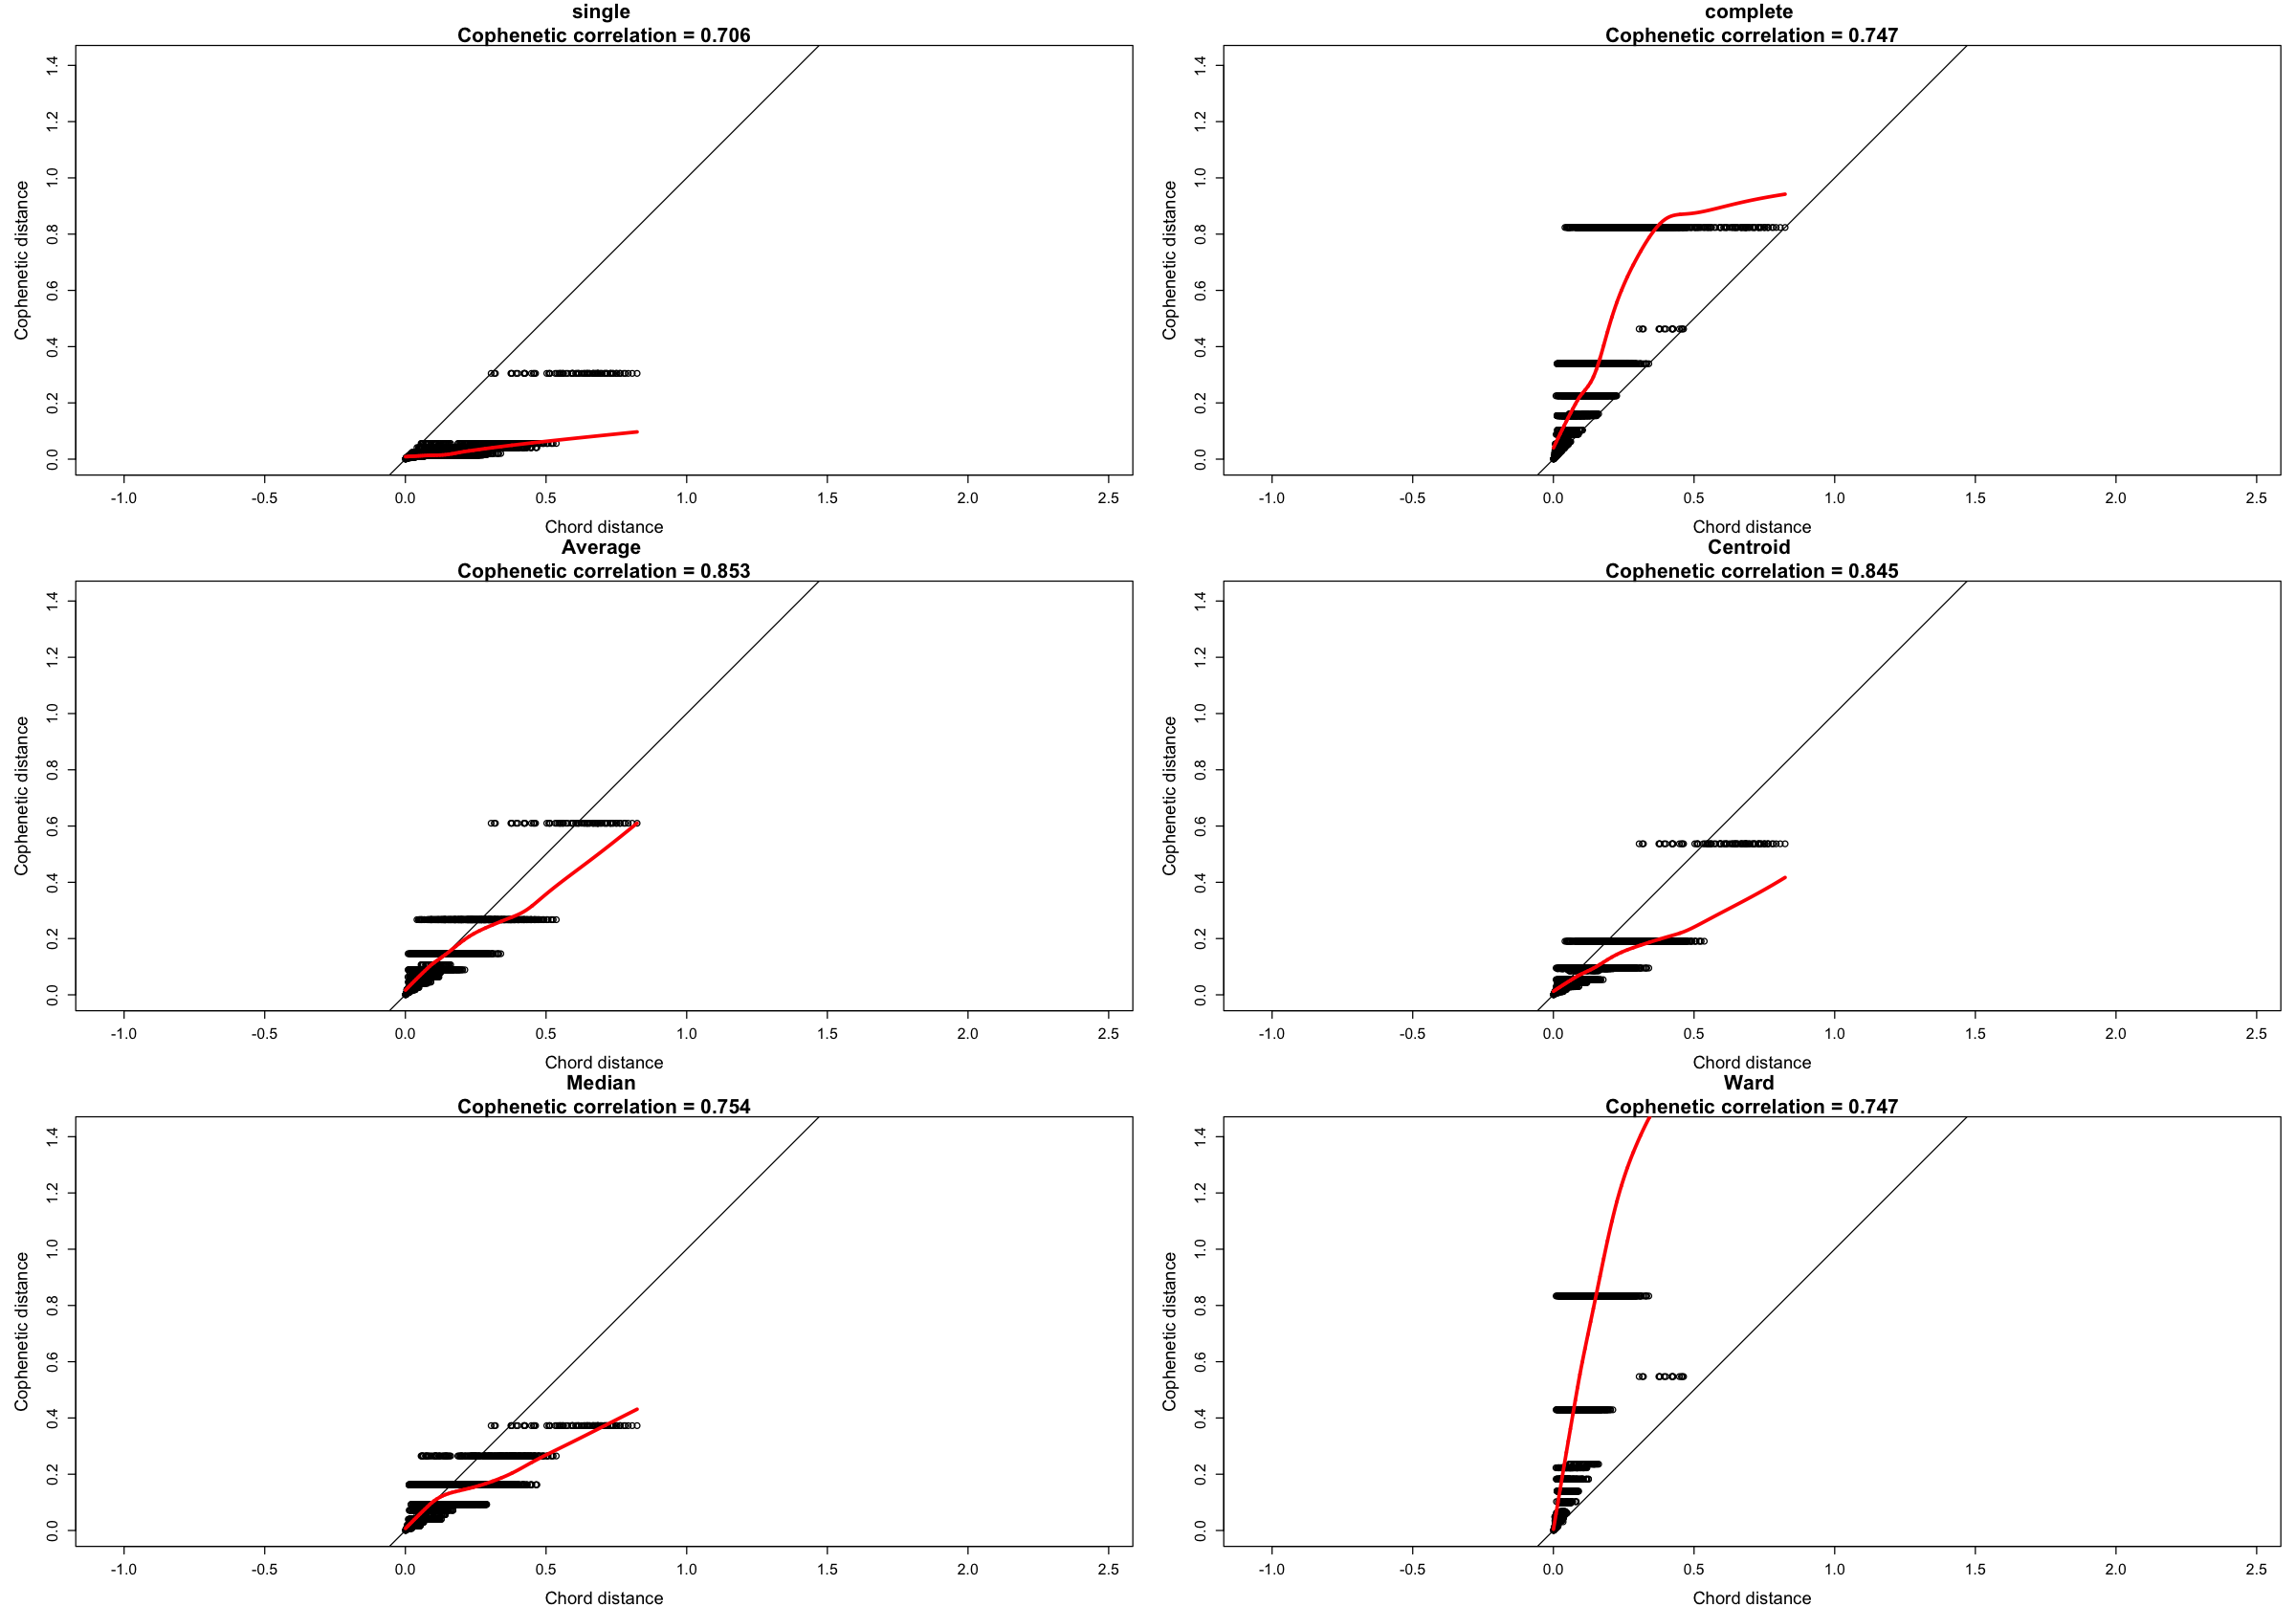

In [100]:
# Set plot size in Jupyter Notebook (17 x 10 inches)
#options(repr.plot.width = 17, repr.plot.height = 10)

# Prepare the graphics window with 3 rows and 2 columns
par(mfrow = c(3, 2), mar = c(4, 5, 3, 1))

# keep reference chord initial  distance
dist_ref <- traits.ch

# Loop over indices from 1 to the length of clustering_list
for (i in 1:length(clustering_list)) {
    
   # Get the clustering object at position i in the list 
  clustering_obj <- clustering_list[[i]]

   # Compute the cophenetic distance matrix for this clustering object 
  cophenetic_dist <- cophenetic(clustering_obj) # (hint : use cophenetic() )

  # Calculate the correlation between the cophenetic distances and the reference distance matrix  
  cophenetic_cor <- cor(cophenetic_dist, traits.ch) # (hint : use cor() )
    
  
  # Round the cophenetic correlation with maximum of 3 digits after comma
  cophenetic_cor <- round(cophenetic_cor, 3)

  # Retrieve the method name
    method <- clustering_name[[i]]

  # Plot Shepard diagram with larger text
  plot(dist_ref, cophenetic_dist,
       xlab = "Chord distance",
       ylab = "Cophenetic distance",
       asp = 1, xlim = c(0, sqrt(2)),
       ylim = c(0, sqrt(2)),
       main = paste(method, "\nCophenetic correlation =", cophenetic_cor),
       cex.main = 1.6,   # title size
       cex.lab = 1.4,    # label size
       cex.axis = 1.2    # axis ticks size
  )
  abline(0, 1)  # 1:1 reference line
  lines(lowess(dist_ref, cophenetic_dist), col = "red", lwd = 3)
    
}


#### Optimal number of cluster

In [101]:
optimal_clusters <- list()
nbclust_results <- list()

for (i in 1:length(clustering_name)) {
  method <- clustering_name[[i]]
  
  if (method == "Average") {
    nbclust_method <- "average"
  } else if (method == "Centroid") {
    nbclust_method <- "centroid"
  } else if (method == "Median") {
    nbclust_method <- "median"
  } else if (method == "Ward") {
    nbclust_method <- "ward.D2"
  } else {
    nbclust_method <- tolower(method)
  }
  
  nb_result <- NbClust(
    traits.numeric,
    diss = traits.ch,  
    distance = NULL,
    min.nc = 2,
    max.nc = 16,
    method = nbclust_method,
    index = "ch"
  )
  
  optimal_clusters[[method]] <- nb_result$Best.nc[1]
  nbclust_results[[method]] <- nb_result
  
  cat(method,":", optimal_clusters[[method]], "\n")
}

single : 14 
complete : 13 
Average : 7 
Centroid : 15 
Median : 16 
Ward : 11 


#### Visualization of the optimal number of cluster

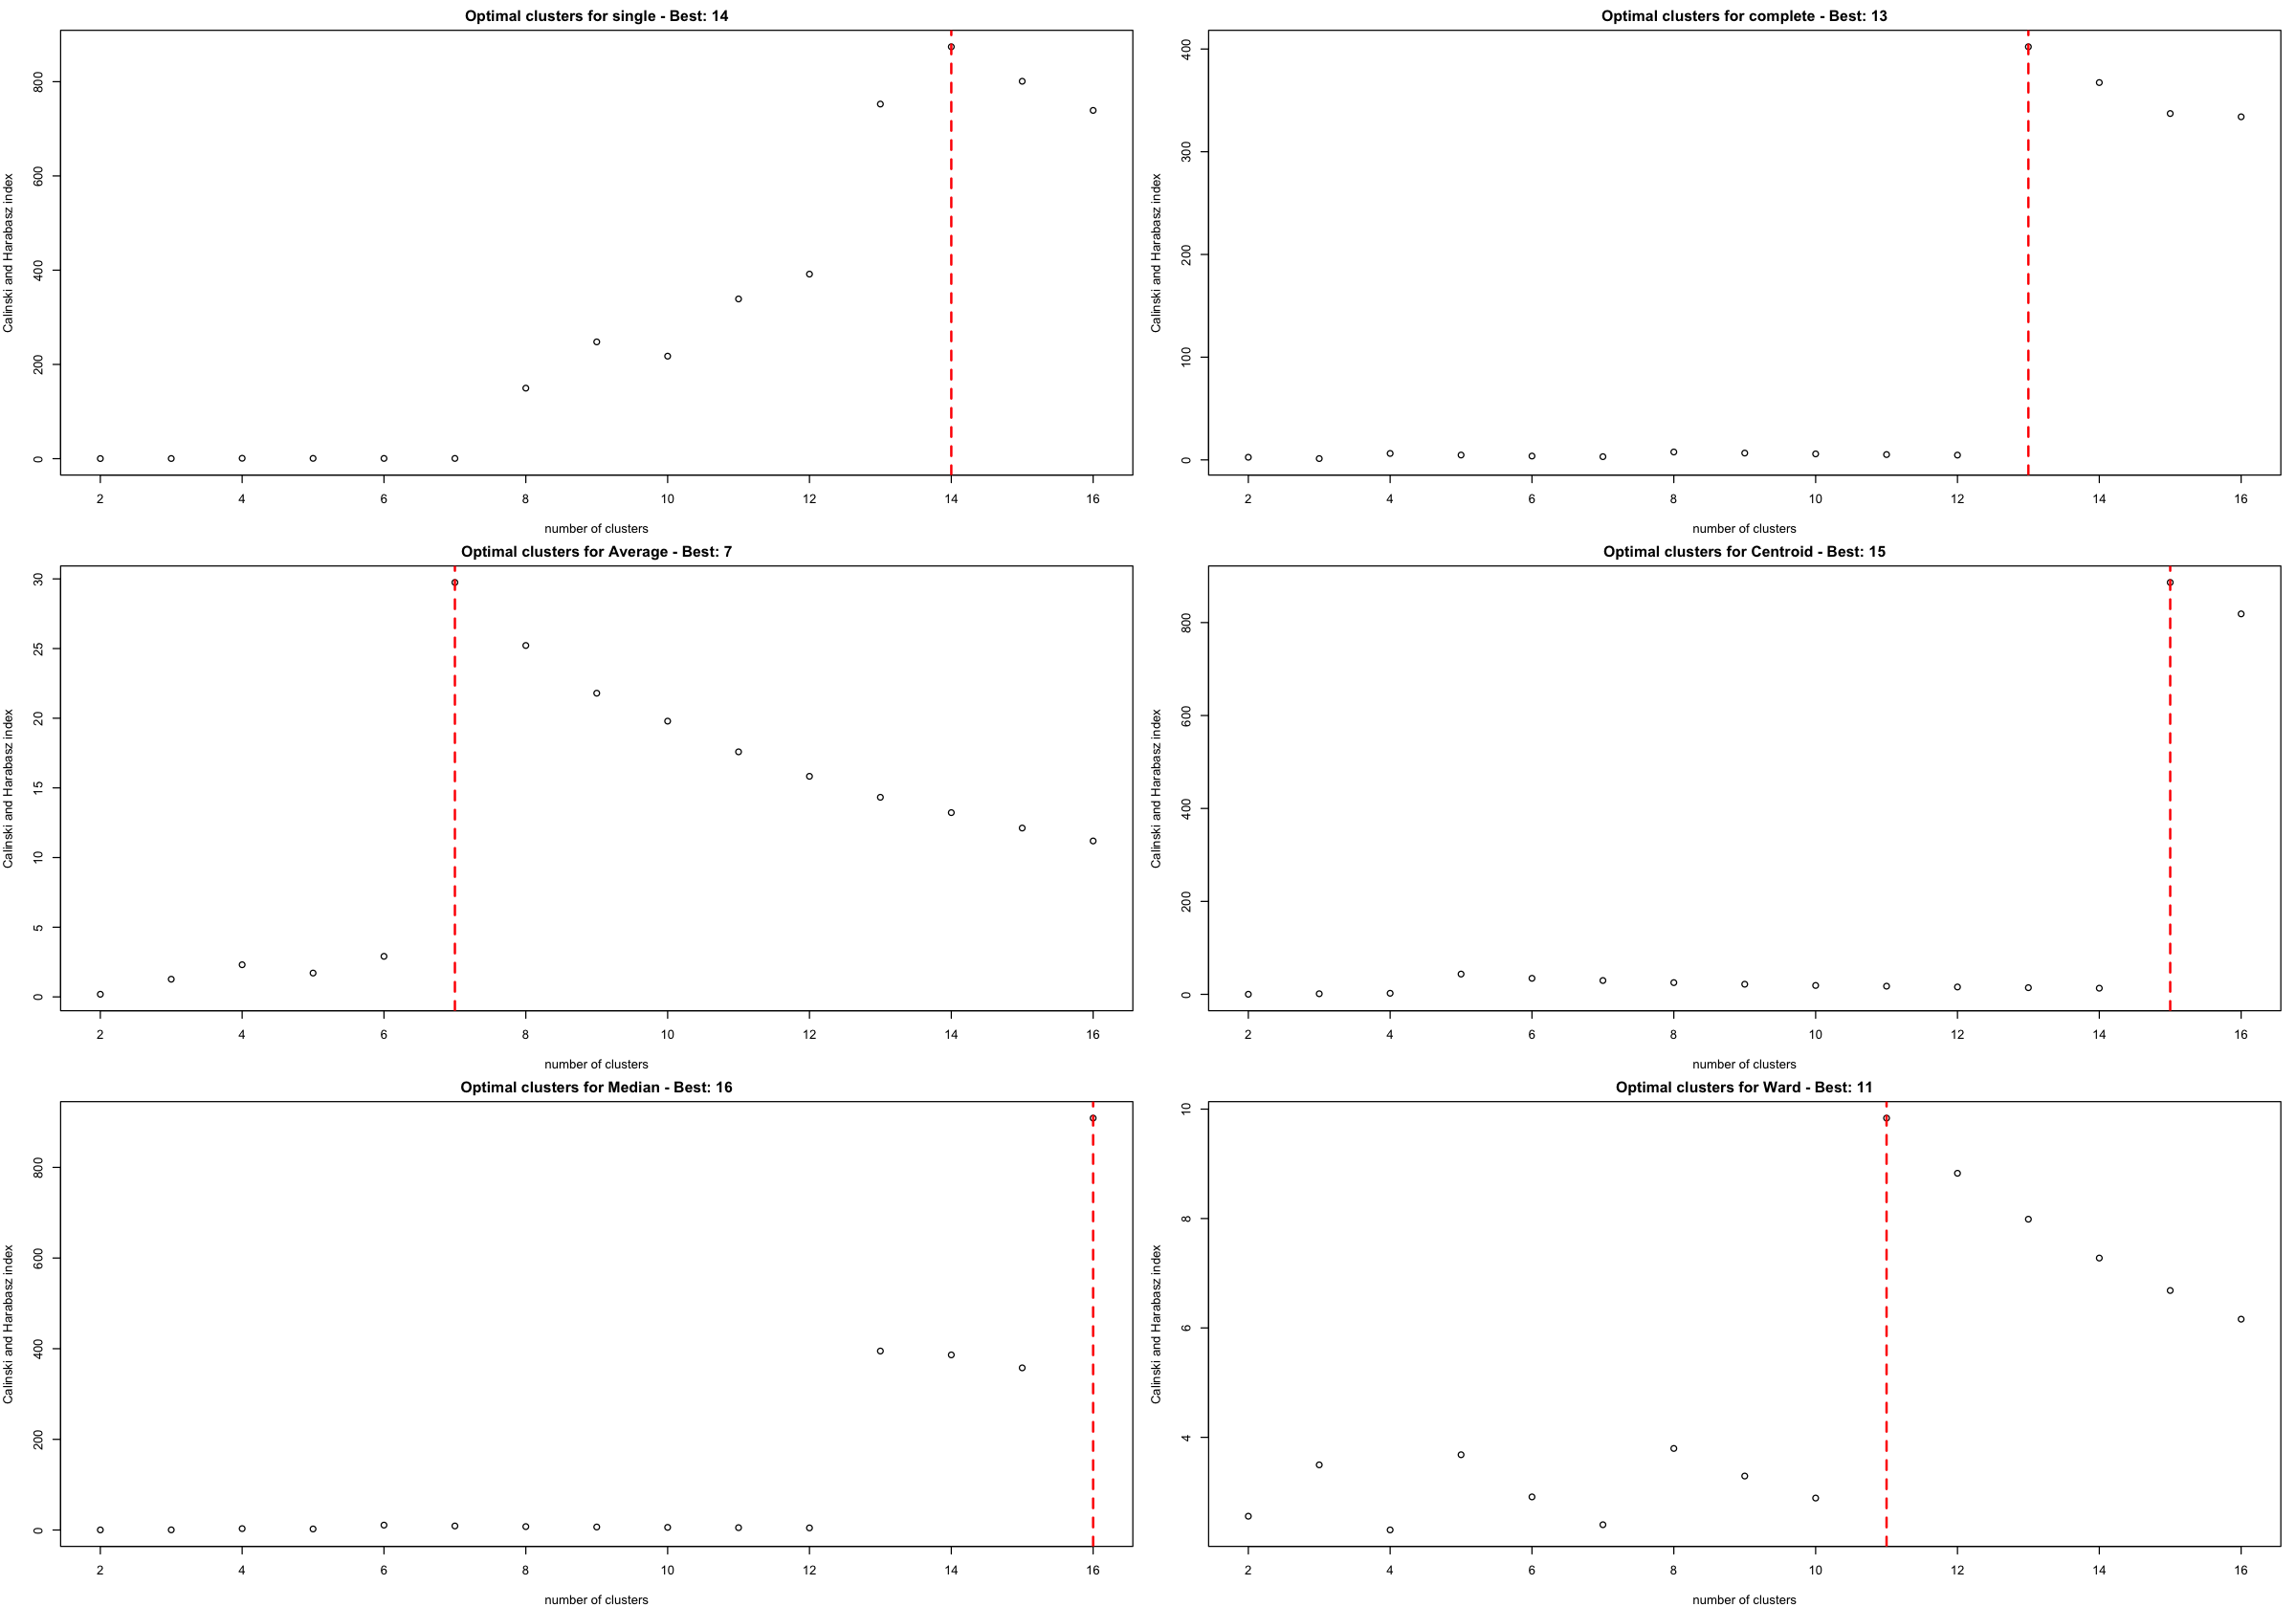

In [102]:
#options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

for (i in 1:length(clustering_name)) {
  method <- clustering_name[[i]]
  nb_result <- nbclust_results[[method]]
  
  plot(2:16,
       nb_result$All.index,
       xlab = "number of clusters",
       ylab = "Calinski and Harabasz index",
       main = paste("Optimal clusters for", method, "- Best:", nb_result$Best.nc[1]))
  
  abline(v = nb_result$Best.nc[1],
         col = "red",
         lty = 2,
         lwd = 2)
}

### Visualisation of dendogram with color

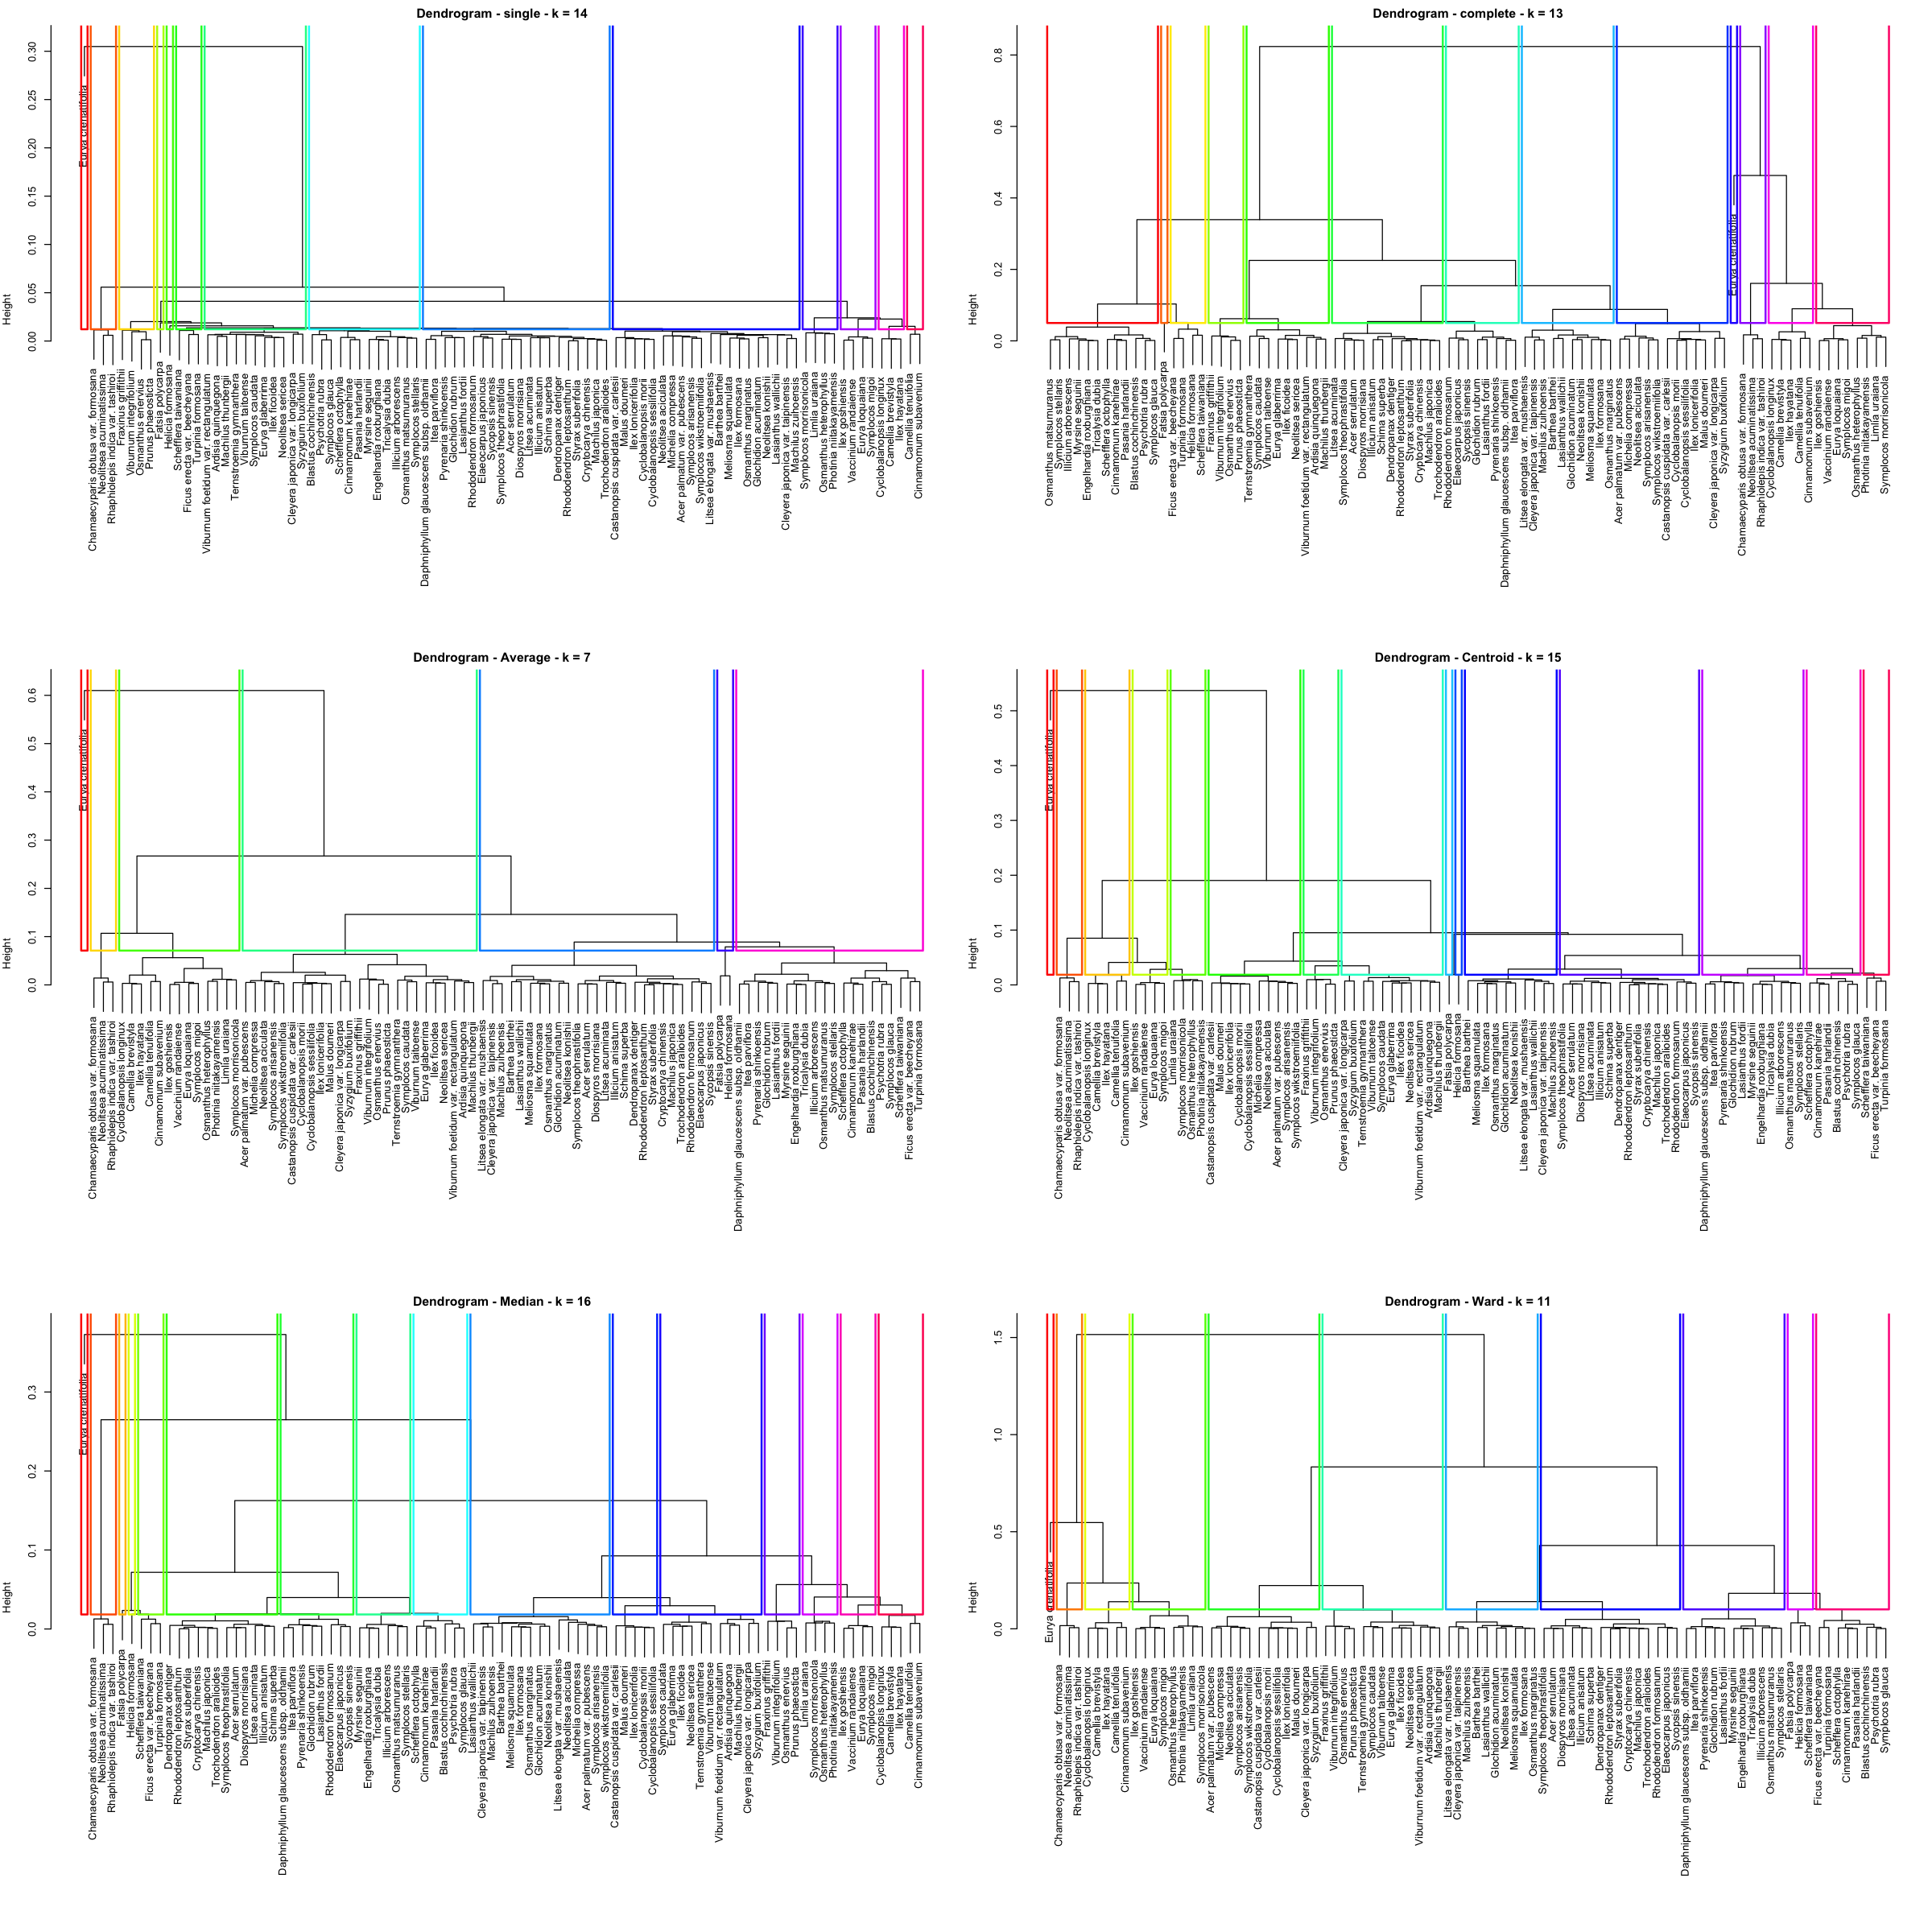

In [107]:
#options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

for (i in 1:length(clustering_name)) {
  method <- clustering_name[[i]]
  hc <- clustering_list[[i]]
  k <- optimal_clusters[[method]]
  
  k <- as.integer(max(2, round(k)))
  
  plot(hc, main = paste("Dendrogram -", method, "- k =", k), xlab = "")
  
  if (!is.na(k) && k > 1) {
    oldpar <- par(lwd = 2)
    rect.hclust(hc, k = k, border = rainbow(k))
    par(oldpar)
  }
}

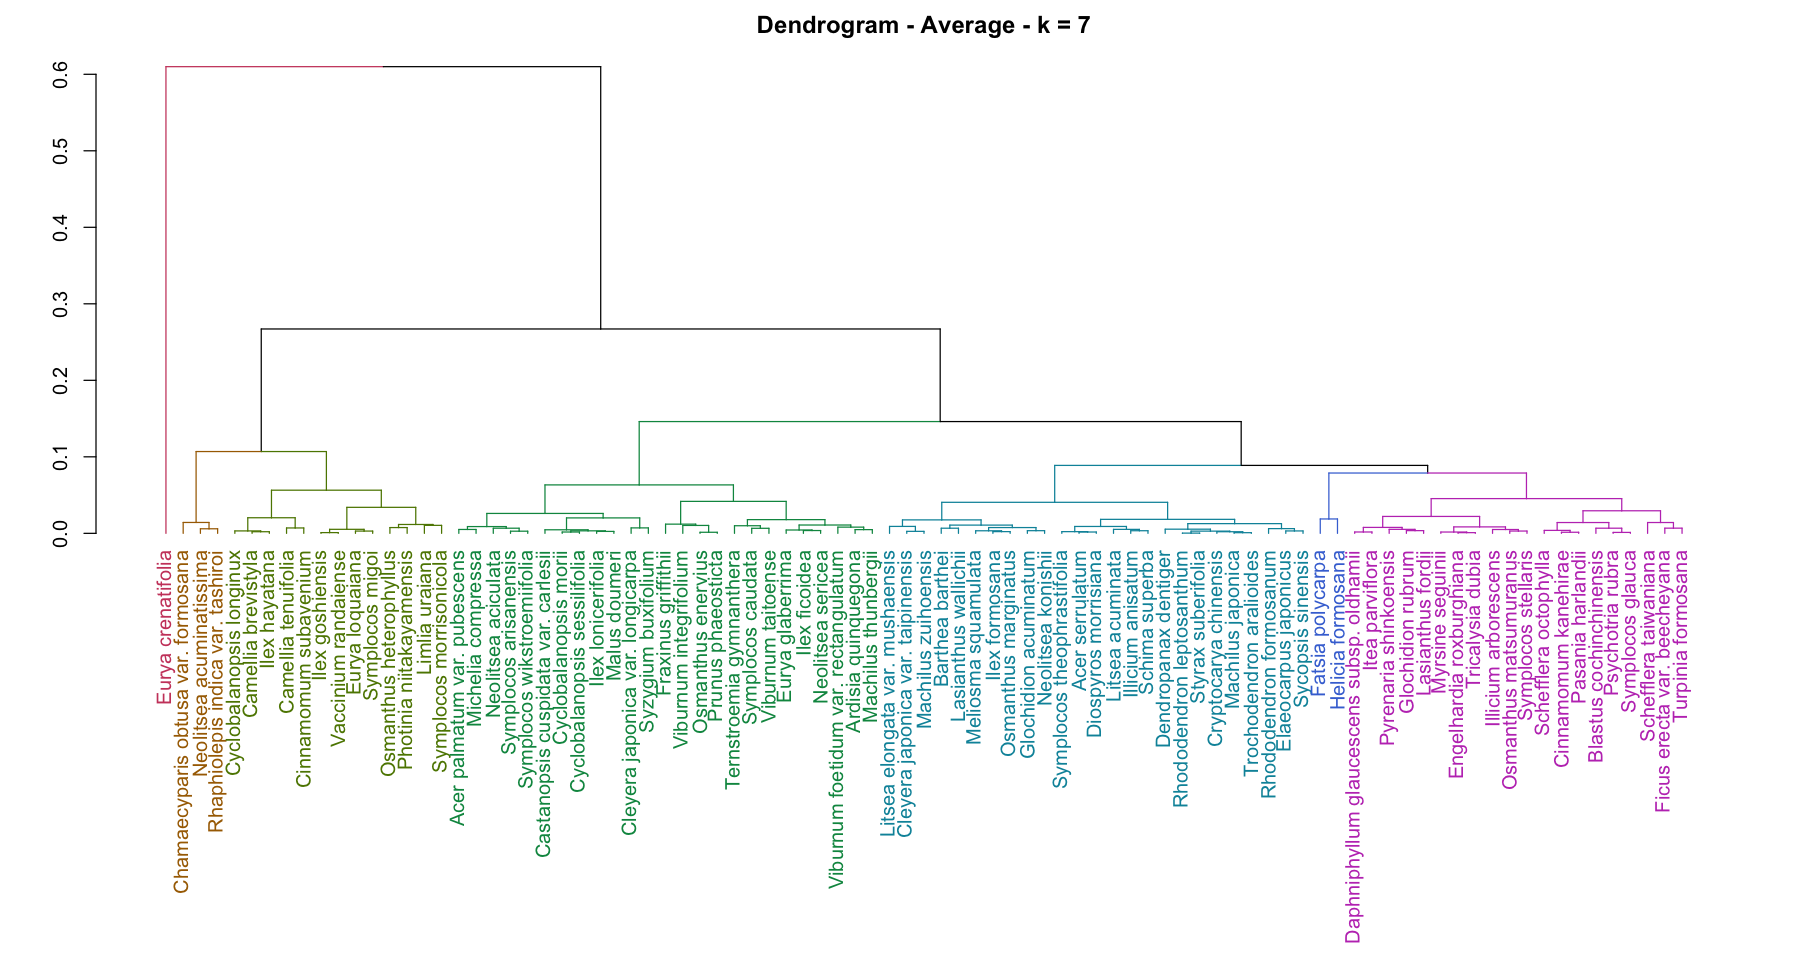

In [ ]:
# Convert the hierarchical clustering result into a dendrogram object
UPGMA.dend <- as.dendrogram(traits.ch.UPGMA)
par(mar = c(17, 4, 2, 2))

# Extract the best partition (cluster assignments)
colors_to_use <- 7

# Reorder the cluster assignments to match the order of dendrogram leaves
colors_to_use <- colors_to_use[order.dendrogram(UPGMA.dend)]

# Set the tip label colors according to the best partition
labels_colors(UPGMA.dend) <- colors_to_use

labels_colors(UPGMA.dend)<-1


# Color the branches of the dendrogram according to the number of clusters found
UPGMA.dend <- UPGMA.dend %>% color_branches(k = 7)
labels_colors(UPGMA.dend) <- 
  get_leaves_branches_col(UPGMA.dend)

# Plot the final colored dendrogram
options(repr.plot.width = 15, repr.plot.height = 8)
plot(UPGMA.dend,main = paste("Dendrogram - Average - k =", 7))

### Clustering between abundance and sites

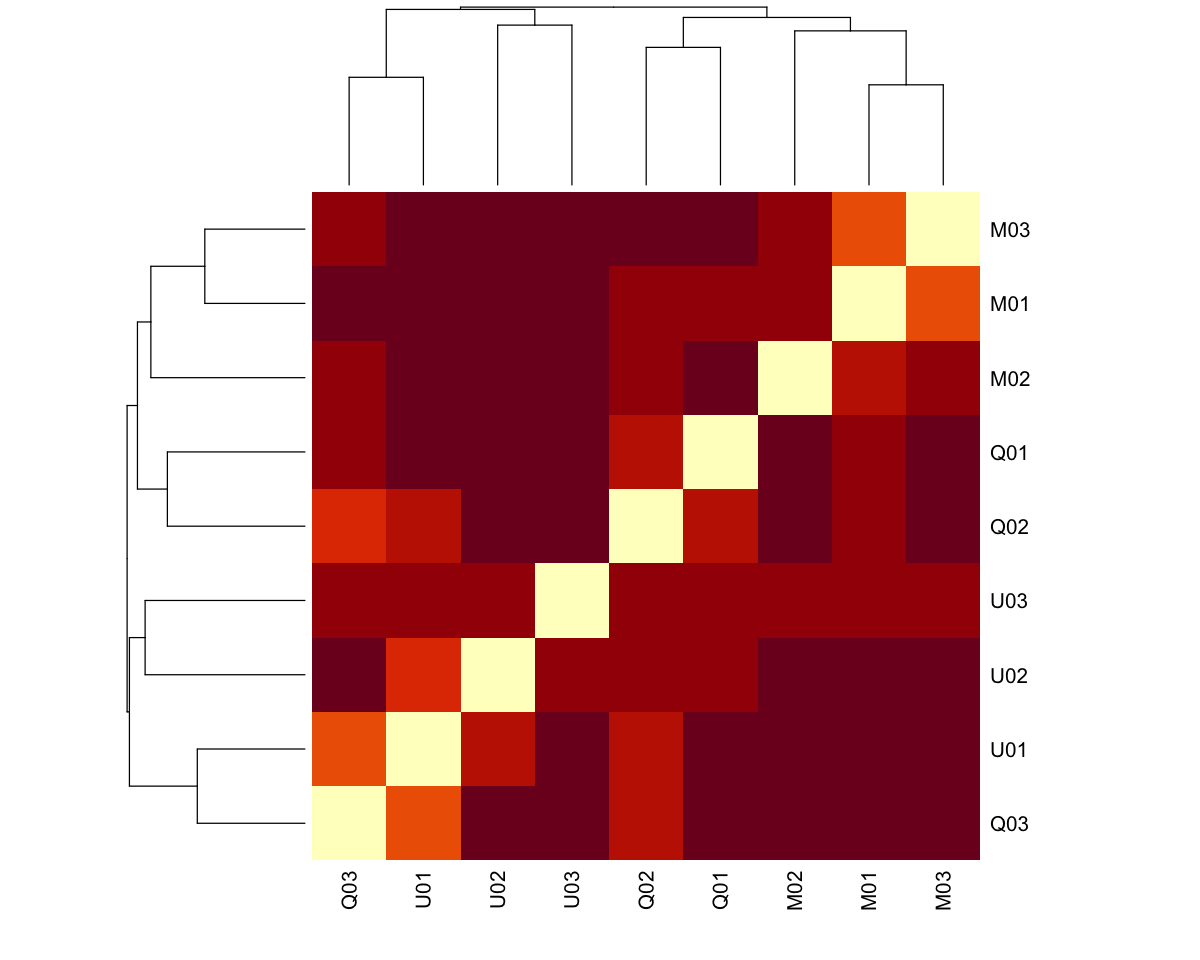

In [62]:
spe.numeric <- spe %>% 
  column_to_rownames(var = colnames(spe)[1]) %>%  # Set first column as row names
  as.data.frame()

spe.norm <- decostand(spe.numeric, "normalize") # normalize datas
spe.ch <- vegdist(spe.norm, "euc") # calculate the chord distance matrix (euclidean distance of normalized species data)

options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(spe.ch))

In [63]:
# Compute single linkage agglomerative clustering
spe.ch.single <- hclust(spe.ch, method = "single") 

# Compute and plot complete-linkage agglomerative clustering
spe.ch.complete <- hclust(spe.ch, method = "complete") 

# Compute and plot UPGMA agglomerative clustering (average linkage)
spe.ch.UPGMA <- hclust(spe.ch, method = "average")

# Compute and plot UPGMC agglomerative clustering (centroid linkage)
spe.ch.centroid <- hclust(spe.ch, method = "centroid") 

# Compute and plot median agglomerative clustering 
spe.ch.median <- hclust(spe.ch, method = "median") 

# Compute and plot Ward's minimum variance agglomerative clustering (hint Ward's minimum variance is called with "ward.D2" )
spe.ch.ward <- hclust(spe.ch, method = "ward.D2") 

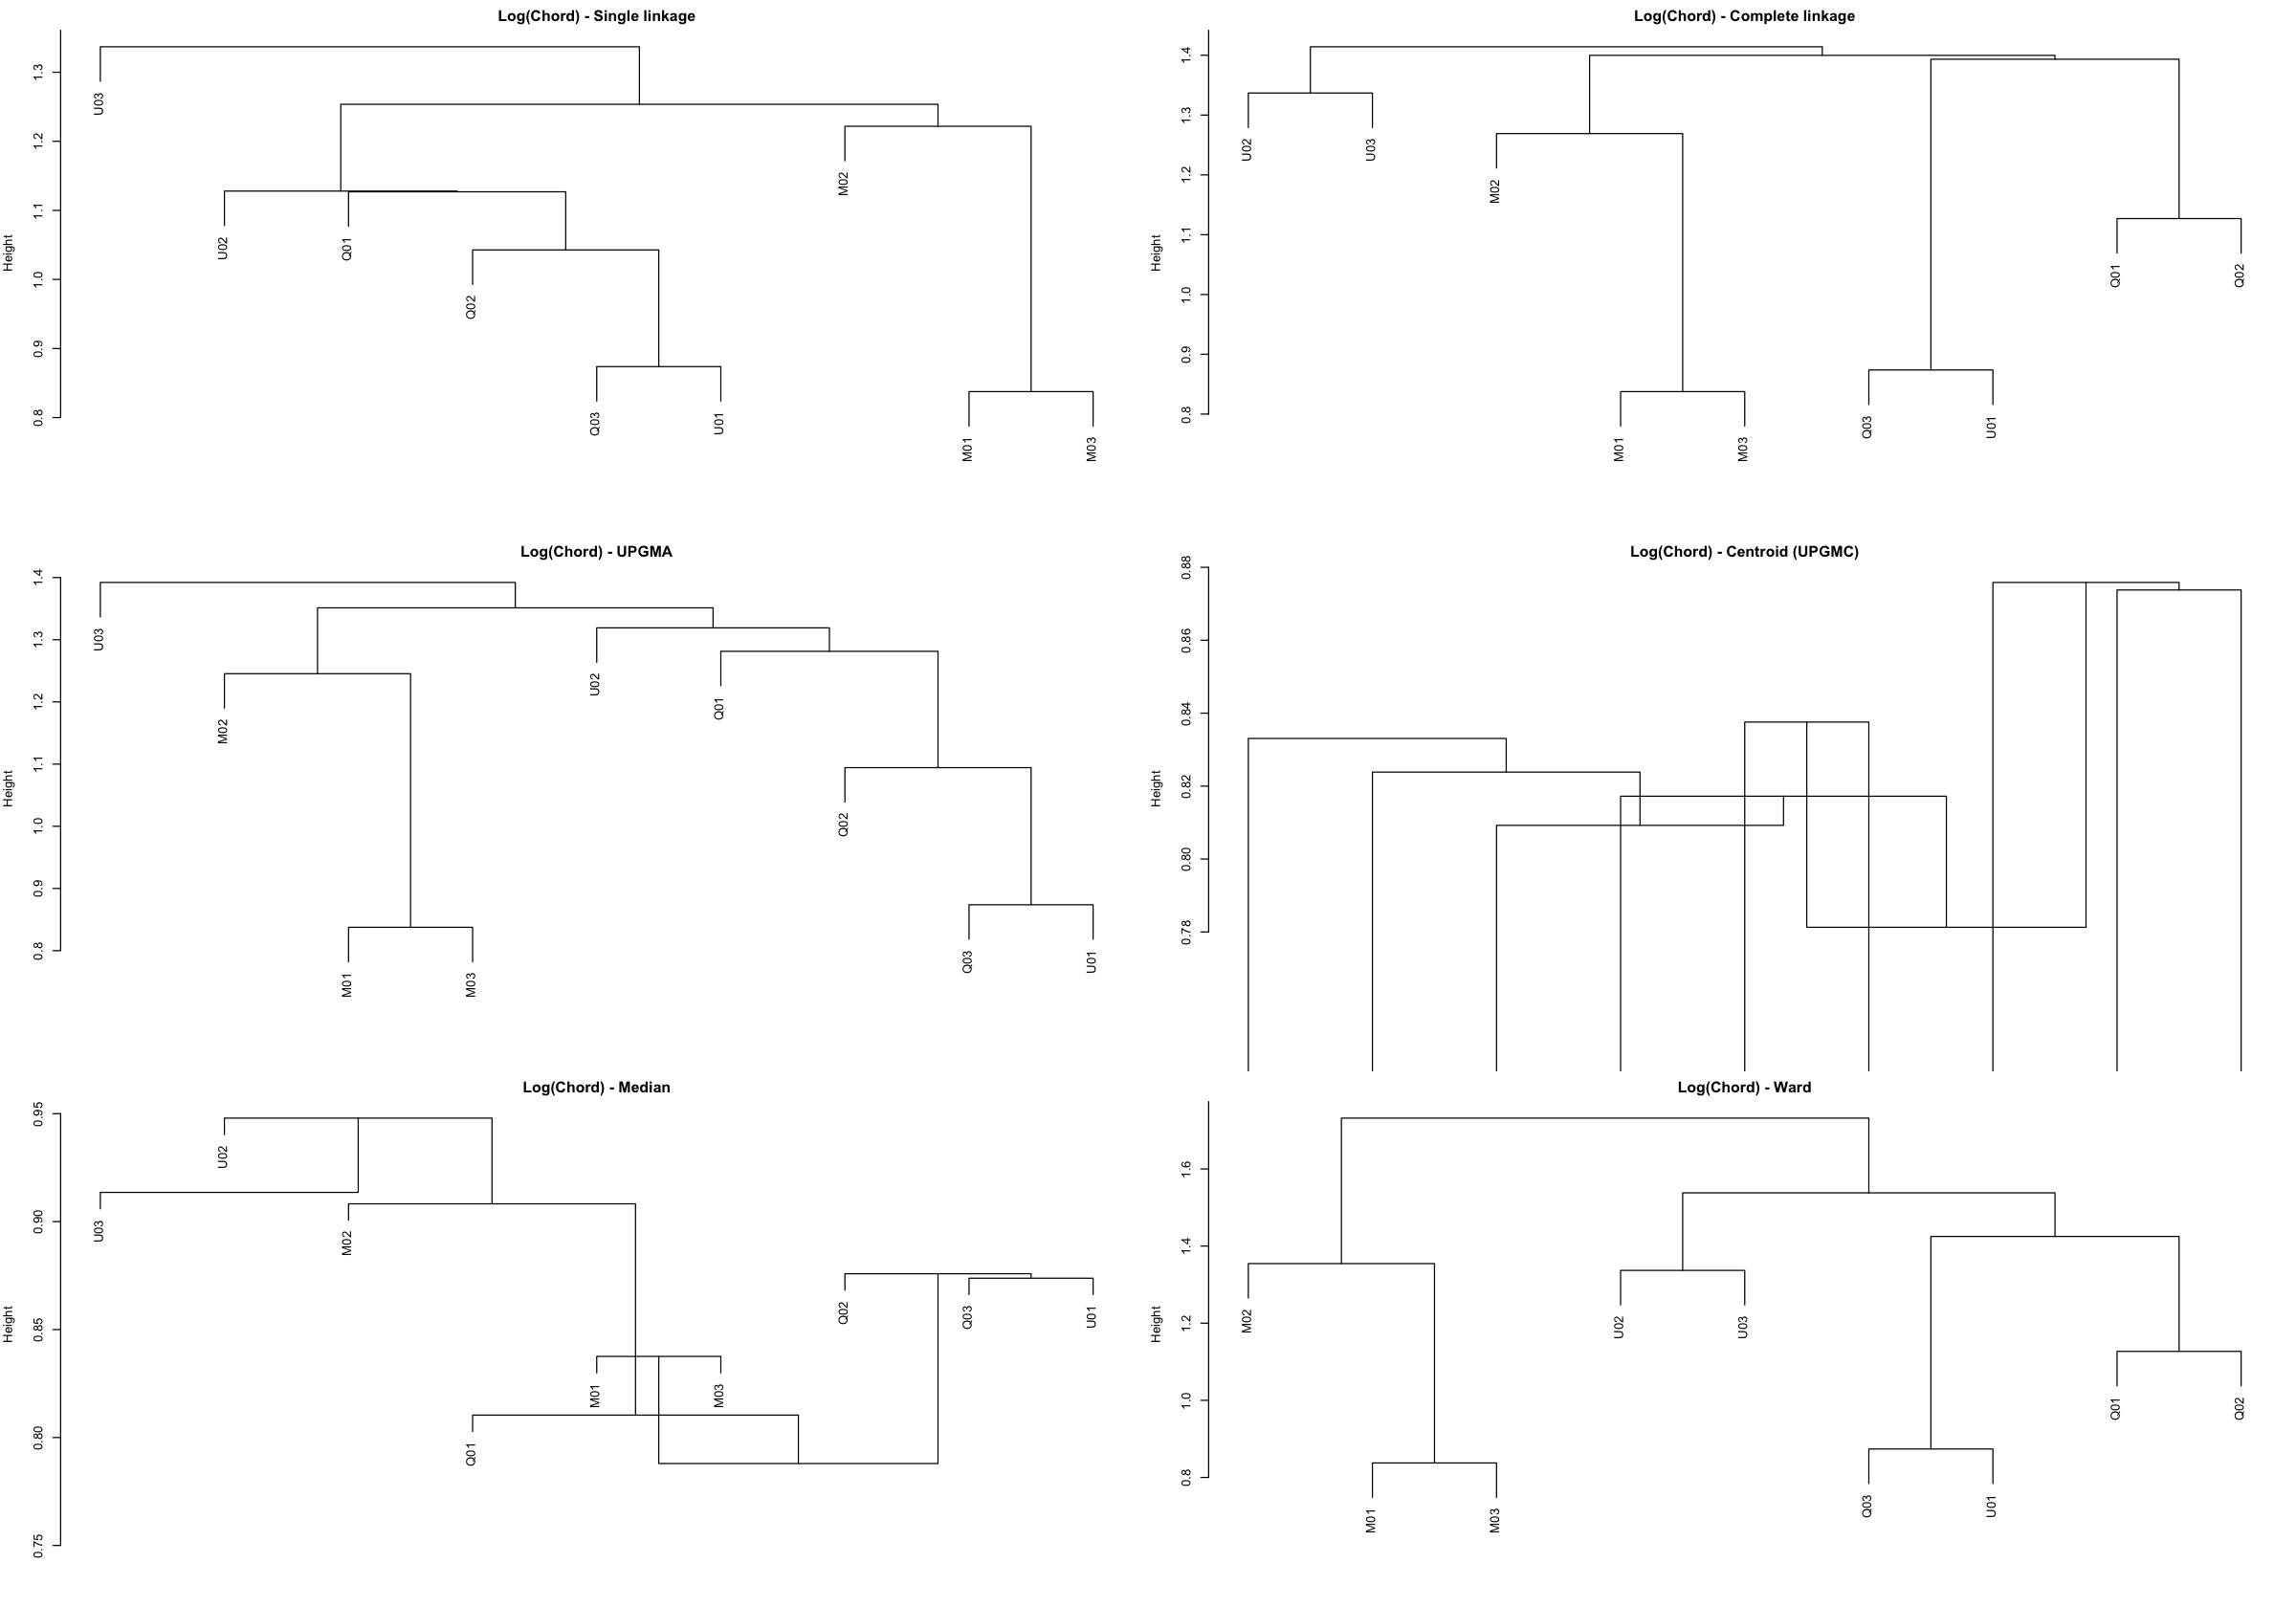

In [64]:
# Set plot size in Jupyter Notebook (20 x 14 inches)
options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))  # 3 rows, 2 columns

# --- Clustering on chord distances (log-transformed data) ---

# Single linkage
plot(spe.ch.single, main = "Log(Chord) - Single linkage", xlab="")

# Complete linkage
plot(spe.ch.complete, main = "Log(Chord) - Complete linkage", xlab="")

# UPGMA (average linkage)
plot(spe.ch.UPGMA, main = "Log(Chord) - UPGMA", xlab="")

# UPGMC (centroid linkage)
plot(spe.ch.centroid, main = "Log(Chord) - Centroid (UPGMC)", xlab="")

# Median
plot(spe.ch.median, main = "Log(Chord) - Median", xlab="")

# Ward's method
plot(spe.ch.ward, main = "Log(Chord) - Ward", xlab="")

In [65]:
# Create a list containing different clustering objects
clustering_list <- list(
  spe.ch.single,
  spe.ch.complete,
  spe.ch.UPGMA,
  spe.ch.centroid,
  spe.ch.median,
  spe.ch.ward
)

# Create a list containing different clustering method's name
clustering_name <- list(
  "single",
  "complete",
  "Average",
  "Centroid",
  "Median",
  "Ward"
)


# Loop over indices from 1 to the length of clustering_list
for (i in 1:length(clustering_list)) {

   # Get the clustering object at position i in the list 
  clustering_obj <- clustering_list[[i]]

   # Compute the cophenetic distance matrix for this clustering object 
  cophenetic_dist <- cophenetic(clustering_obj) # (hint : use cophenetic() )

  # Calculate the correlation between the cophenetic distances and the reference distance matrix  
  cophenetic_cor <- cor(cophenetic_dist, spe.ch) 

   # Print the clustering method name and its corresponding correlation value 
  cat(clustering_name[[i]], ": ", cophenetic_cor, "\n")
}

single :  0.8264814 
complete :  0.8209811 
Average :  0.8986514 
Centroid :  -0.4141534 
Median :  0.2190212 
Ward :  0.7870955 


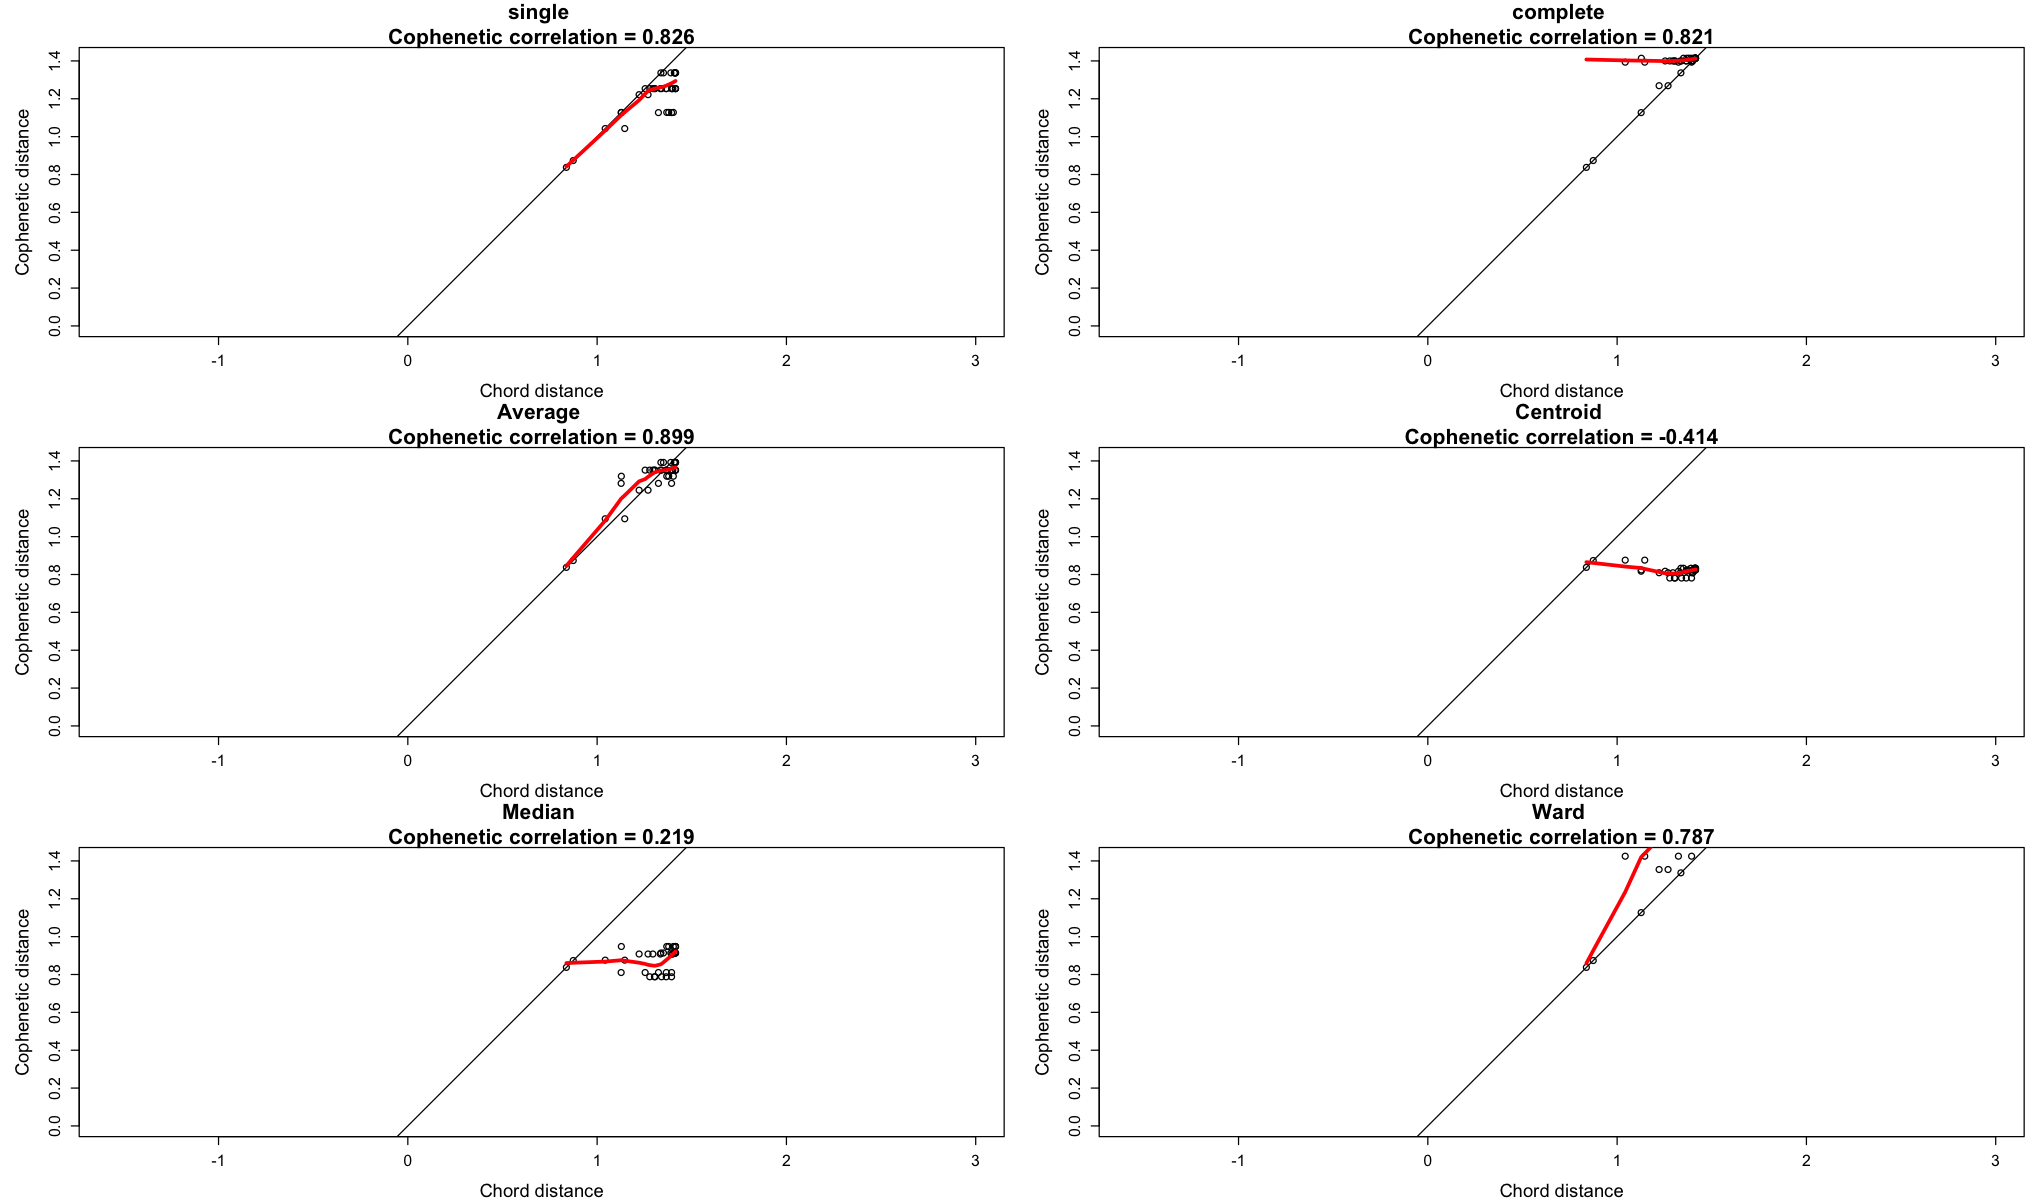

In [66]:
# Set plot size in Jupyter Notebook (17 x 10 inches)
options(repr.plot.width = 17, repr.plot.height = 10)

# Prepare the graphics window with 3 rows and 2 columns
par(mfrow = c(3, 2), mar = c(4, 5, 3, 1))

# keep reference chord initial  distance
dist_ref <- spe.ch

# Loop over indices from 1 to the length of clustering_list
for (i in 1:length(clustering_list)) {
    
   # Get the clustering object at position i in the list 
  clustering_obj <- clustering_list[[i]]

   # Compute the cophenetic distance matrix for this clustering object 
  cophenetic_dist <- cophenetic(clustering_obj) # (hint : use cophenetic() )

  # Calculate the correlation between the cophenetic distances and the reference distance matrix  
  cophenetic_cor <- cor(cophenetic_dist, spe.ch) # (hint : use cor() )
    
  
  # Round the cophenetic correlation with maximum of 3 digits after comma
  cophenetic_cor <- round(cophenetic_cor, 3)

  # Retrieve the method name
    method <- clustering_name[[i]]

  # Plot Shepard diagram with larger text
  plot(dist_ref, cophenetic_dist,
       xlab = "Chord distance",
       ylab = "Cophenetic distance",
       asp = 1, xlim = c(0, sqrt(2)),
       ylim = c(0, sqrt(2)),
       main = paste(method, "\nCophenetic correlation =", cophenetic_cor),
       cex.main = 1.6,   # title size
       cex.lab = 1.4,    # label size
       cex.axis = 1.2    # axis ticks size
  )
  abline(0, 1)  # 1:1 reference line
  lines(lowess(dist_ref, cophenetic_dist), col = "red", lwd = 3)
    
}


In [67]:
optimal_clusters <- list()
nbclust_results <- list()


for (i in 1:length(clustering_name)) {
  method <- clustering_name[[i]]
  
  if (method == "Average") {
    nbclust_method <- "average"
  } else if (method == "Centroid") {
    nbclust_method <- "centroid"
  } else if (method == "Median") {
    nbclust_method <- "median"
  } else if (method == "Ward") {
    nbclust_method <- "ward.D2"
  } else {
    nbclust_method <- tolower(method)
  }
  
  nb_result <- NbClust(
    spe.numeric,
    diss = spe.ch,  
    distance = NULL,
    min.nc = 3,
    max.nc = 5,
    method = nbclust_method,
    index = "ch"
  )
  
  optimal_clusters[[method]] <- nb_result$Best.nc[1]
  nbclust_results[[method]] <- nb_result
  
  cat(method,":", optimal_clusters[[method]], "\n")
}

single : 3 
complete : 5 
Average : 5 
Centroid : 3 
Median : 3 
Ward : 3 


In [68]:
options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

for (i in 1:length(clustering_name)) {
  method <- clustering_name[[i]]
  nb_result <- nbclust_results[[method]]
  
  plot(2:5,
       nb_result$All.index,
       xlab = "number of clusters",
       ylab = "Calinski and Harabasz index",
       main = paste("Optimal clusters for", method, "- Best:", nb_result$Best.nc[1]))
  
  abline(v = nb_result$Best.nc[1],
         col = "red",
         lty = 2,
         lwd = 2)
}

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


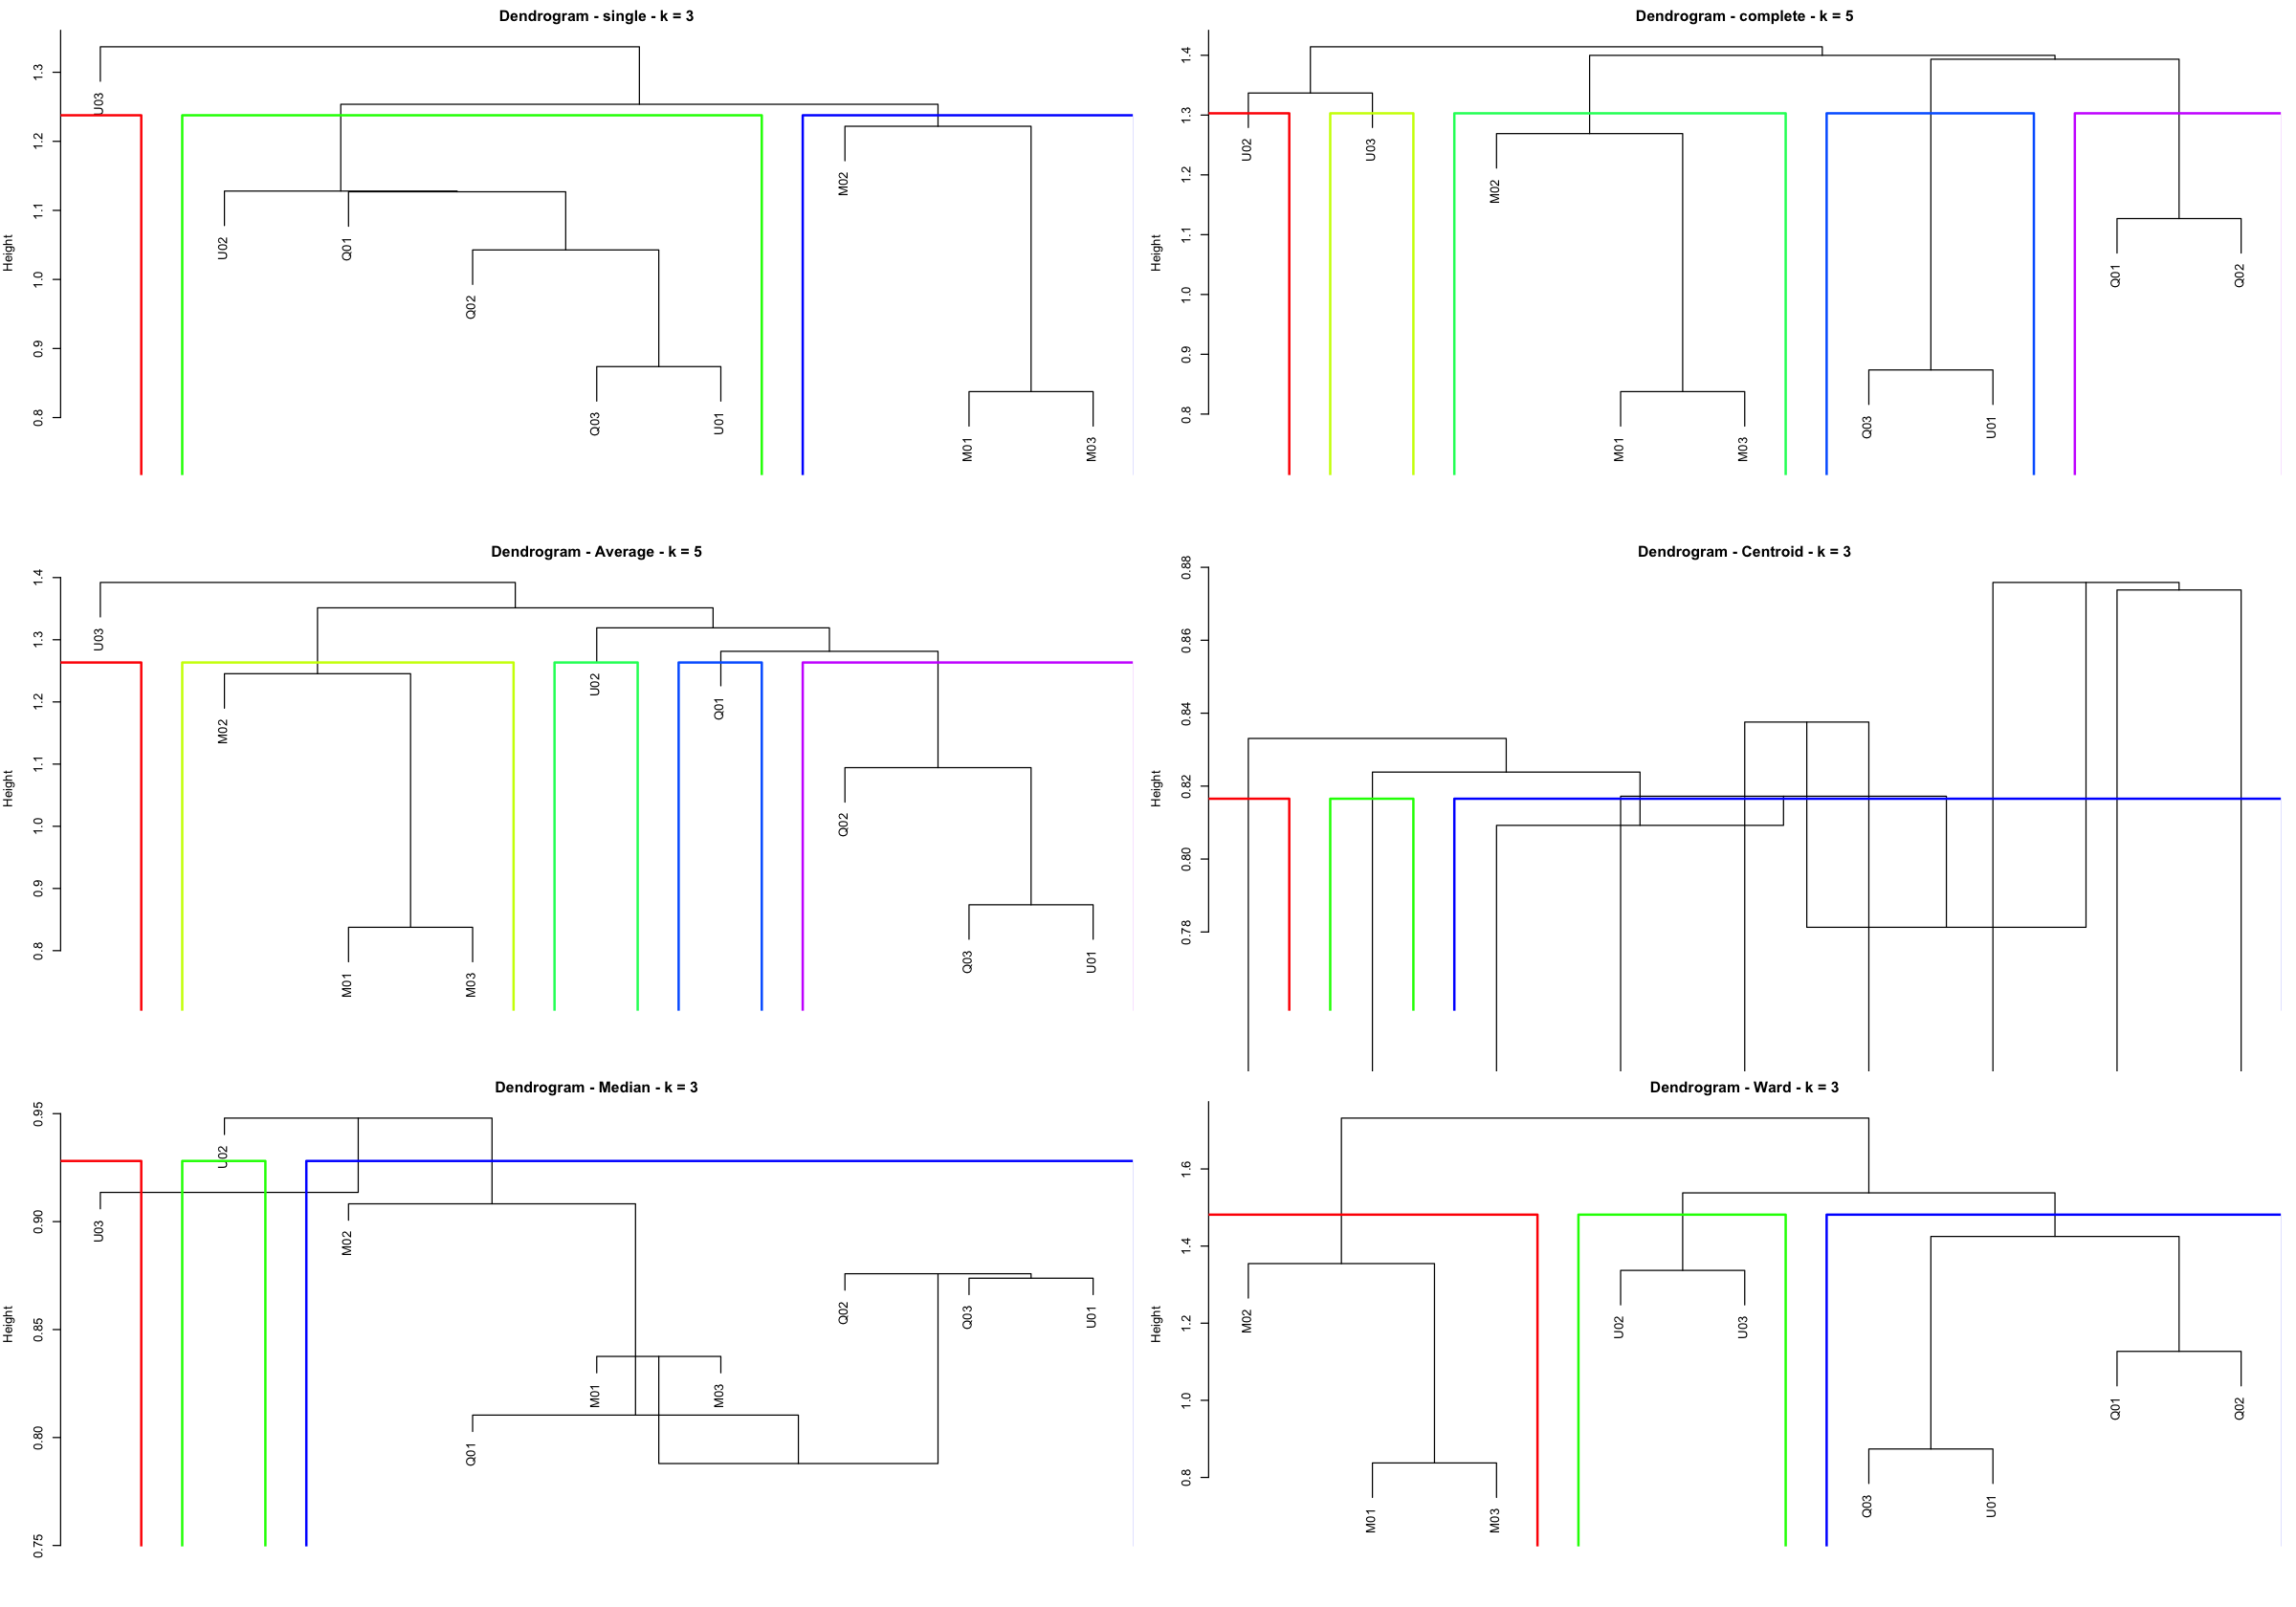

In [69]:
options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

for (i in 1:length(clustering_name)) {
  method <- clustering_name[[i]]
  hc <- clustering_list[[i]]
  k <- optimal_clusters[[method]]
  
  k <- as.integer(max(2, round(k)))
  
  plot(hc, main = paste("Dendrogram -", method, "- k =", k), xlab = "")
  
  if (!is.na(k) && k > 1) {
    oldpar <- par(lwd = 2)
    rect.hclust(hc, k = k, border = rainbow(k))
    par(oldpar)
  }
}

To see only the most interesting methods with color and 3 cluster

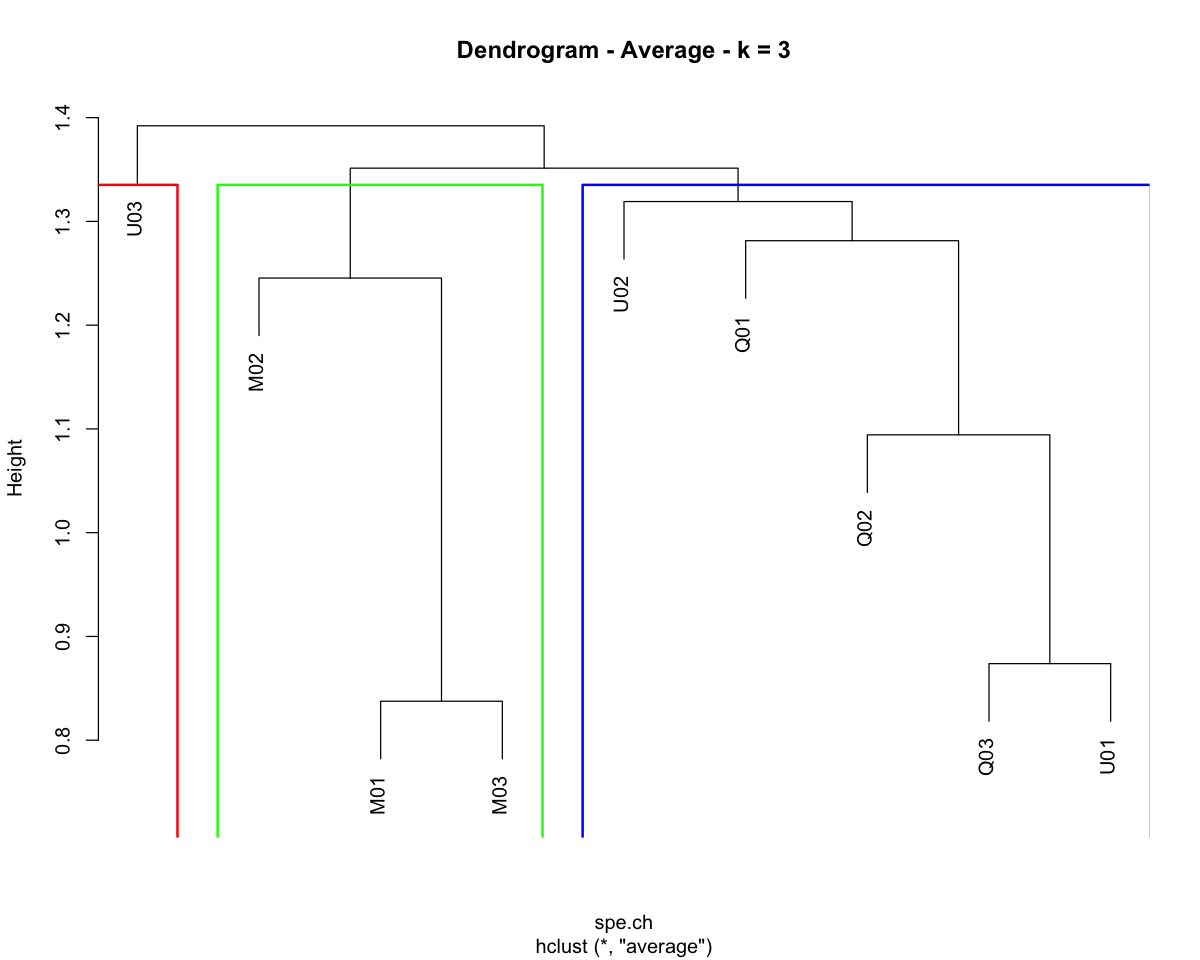

In [79]:
k <- 3
hc <- spe.ch.UPGMA
# Plot dendrogram and highlight clusters
options(repr.plot.width = 10, repr.plot.height = 8)
plot(hc, main = paste("Dendrogram - Average - k =", k))
if (!is.na(k) && k > 1) {
  oldpar <- par(lwd = 2)
  rect.hclust(hc, k = k, border = rainbow(k))    # encadre les clusters
  par(oldpar)
}

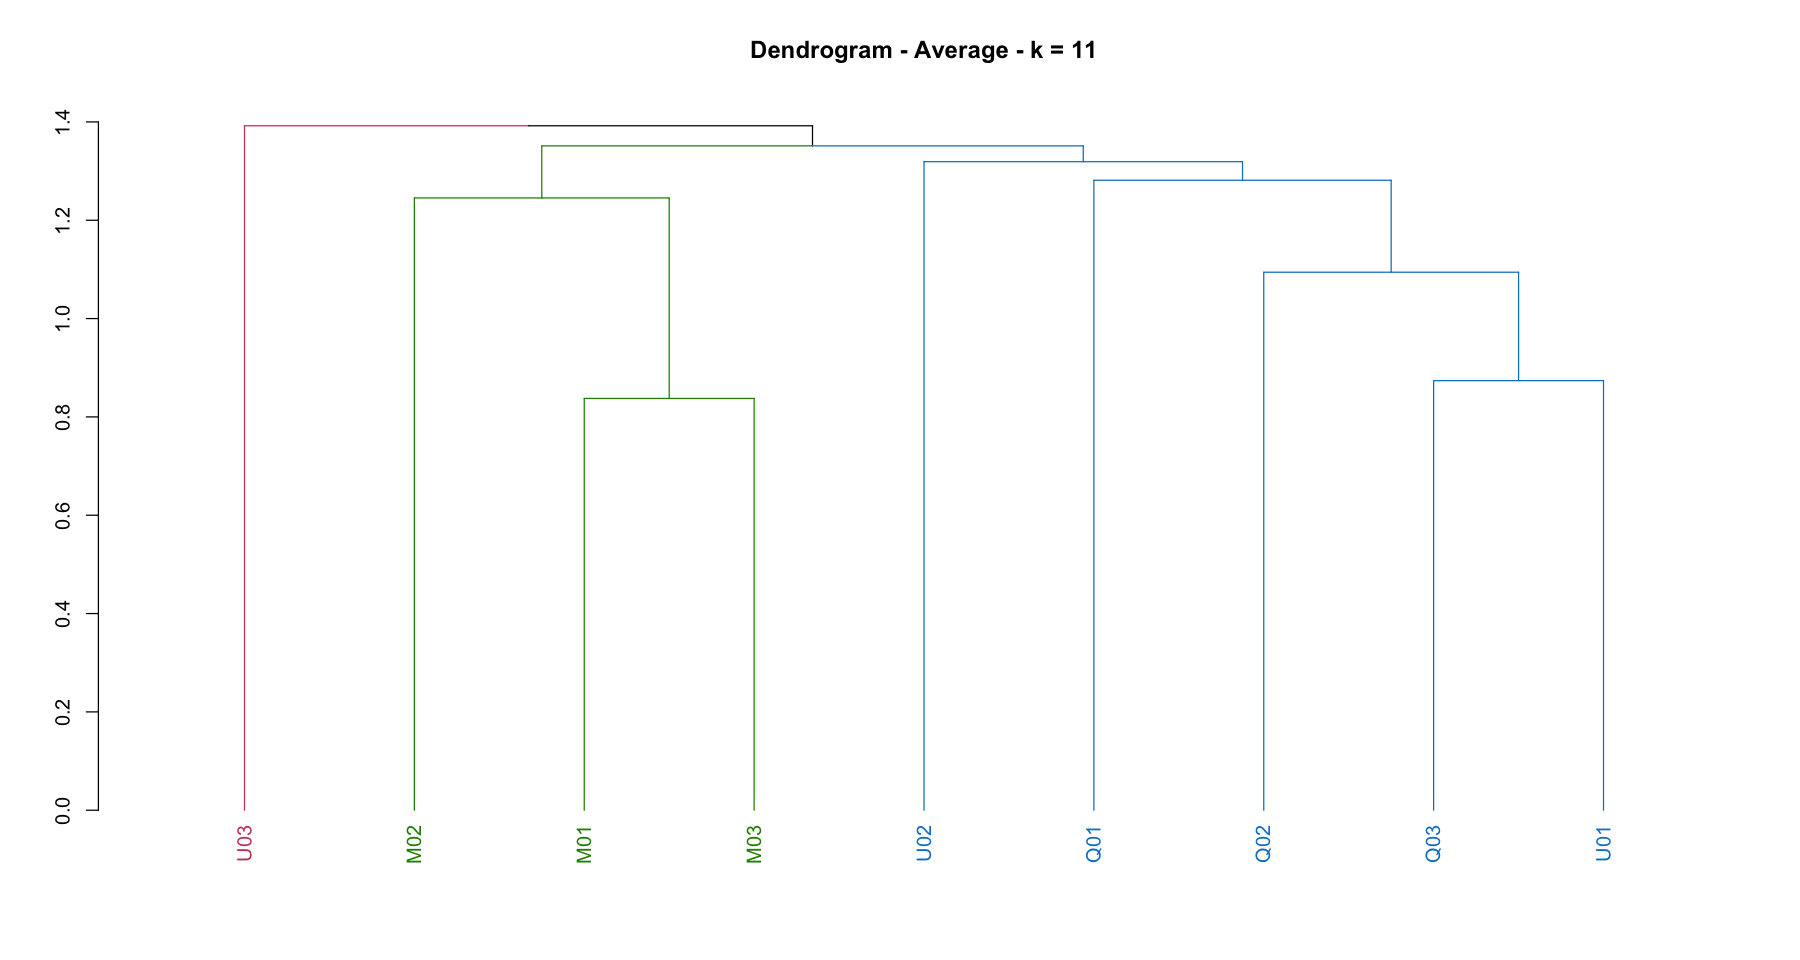

In [118]:
# Convert the hierarchical clustering result into a dendrogram object
UPGMA.dend <- as.dendrogram(spe.ch.UPGMA)

# Extract the best partition (cluster assignments)
colors_to_use <- 3

# Reorder the cluster assignments to match the order of dendrogram leaves
colors_to_use <- colors_to_use[order.dendrogram(UPGMA.dend)]

# Set the tip label colors according to the best partition
labels_colors(UPGMA.dend) <- colors_to_use

labels_colors(UPGMA.dend)<-1


# Color the branches of the dendrogram according to the number of clusters found
UPGMA.dend <- UPGMA.dend %>% color_branches(k = 3)
labels_colors(UPGMA.dend) <- 
  get_leaves_branches_col(UPGMA.dend)

# Plot the final colored dendrogram
plot(UPGMA.dend,main = paste("Dendrogram - Average - k =", k))

## PCoA

Average cluster

          M01       M02       M03       Q01       Q02       Q03       U01
M02 1.2217848                                                            
M03 0.8375617 1.2690128                                                  
Q01 1.2536300 1.3944600 1.3654448                                        
Q02 1.2781406 1.3339139 1.3404112 1.1269296                              
Q03 1.3028390 1.2945328 1.3060528 1.3238517 1.0427409                    
U01 1.3650200 1.3998677 1.3931773 1.3934027 1.1458584 0.8737859          
U02 1.4142136 1.4137391 1.4142136 1.3780734 1.3678148 1.4026732 1.1279569
U03 1.4142136 1.4140476 1.4141070 1.4081217 1.3893560 1.4098913 1.3505826
          U02
M02          
M03          
Q01          
Q02          
Q03          
U01          
U02          
U03 1.3369047

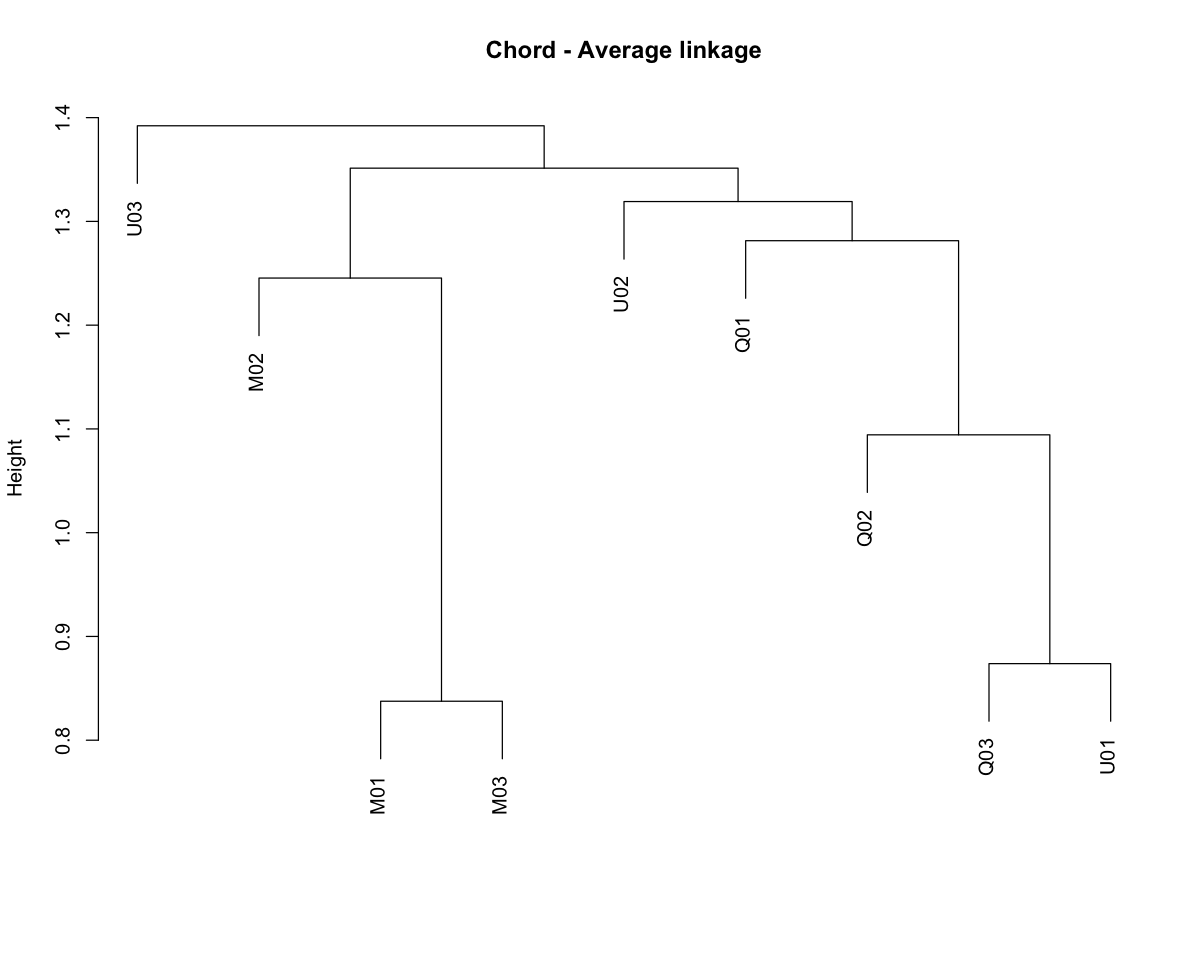

In [33]:
spe_mat <- spe %>%
  column_to_rownames("site")

#normalize abundance
spe_norm <- decostand(spe_mat, method = "normalize")

#Chord distance matrix
spe.ch <- vegdist(spe_norm, method = "euclidean")
spe.ch

# Hierarchical clustering
spe.avg <- hclust(spe.ch, method = "average")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe.avg, main = "Chord - Average linkage", xlab = "", sub = "")

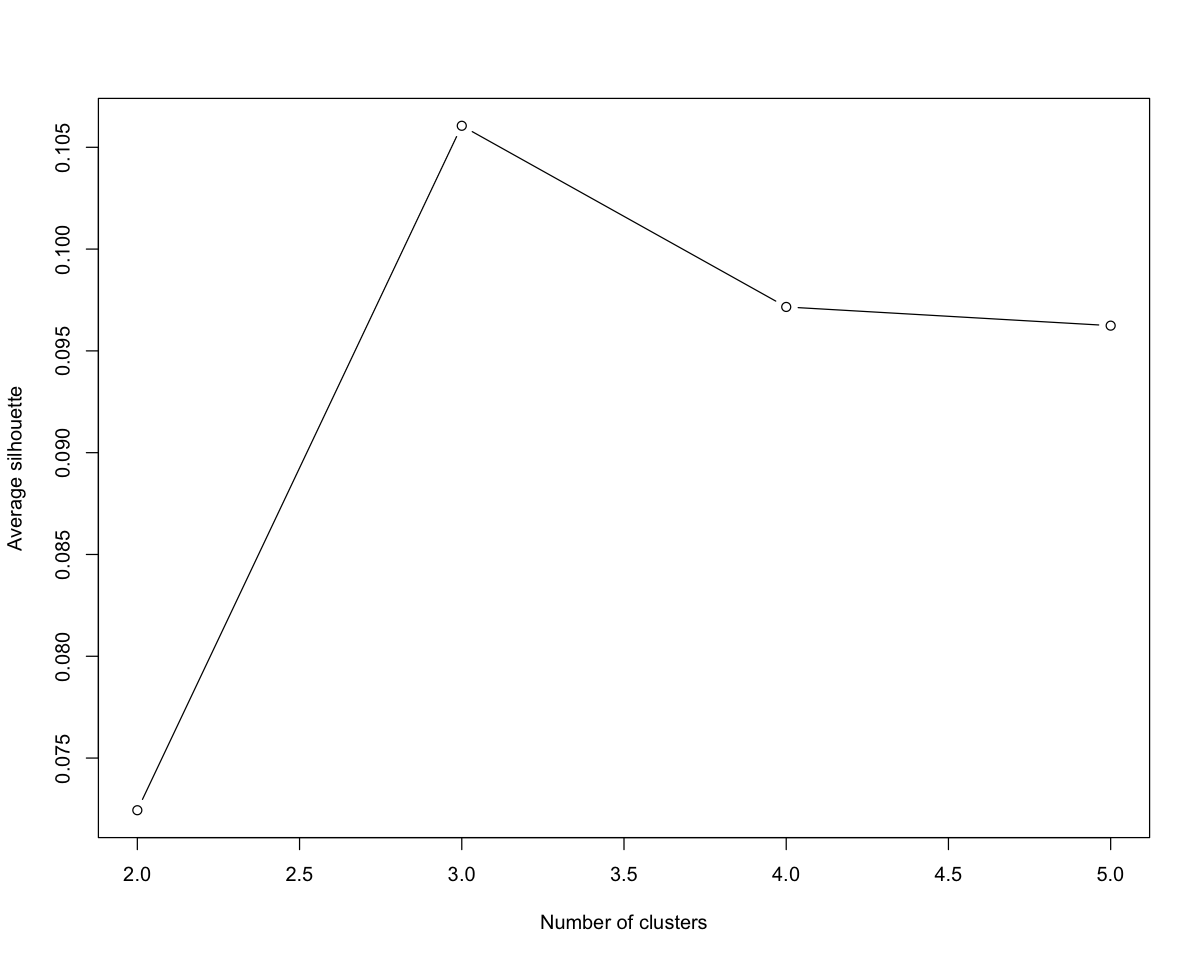

In [34]:
sil_width <- c()
for(k in 2:5){
  clust <- cutree(spe.avg, k=k)
  sil <- silhouette(clust, spe.ch)
  sil_width[k] <- mean(sil[,3])
}
plot(2:5, sil_width[2:5], type="b", xlab="Number of clusters", ylab="Average silhouette")

In [35]:
k_opt <- 3  
clusters <- cutree(spe.avg, k=k_opt)

site_clusters <- data.frame(
  site = rownames(spe_norm),
  cluster = factor(clusters)
)

PCoA

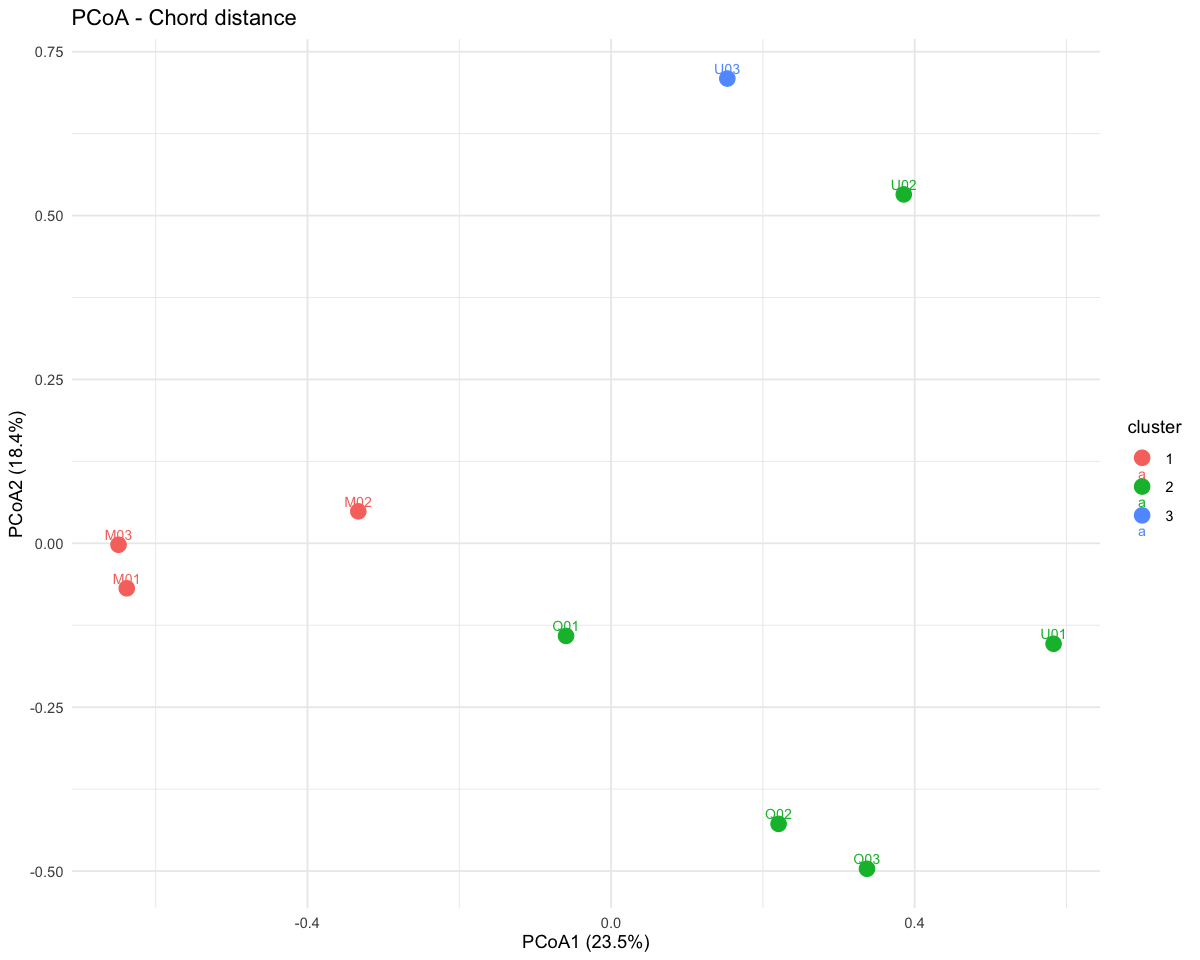

In [36]:
# PCoA (only point)
pcoa <- cmdscale(spe.ch, eig = TRUE, k = 2)

# Variance 
eig <- pcoa$eig
var_expl <- eig / sum(eig)

# Data frame for plotting
pcoa_sites <- data.frame(
  site = rownames(pcoa$points),
  PC1 = pcoa$points[,1],
  PC2 = pcoa$points[,2],
  cluster = factor(clusters)
)

# Scatter plot 
ggplot(pcoa_sites, aes(x=PC1, y=PC2, color=cluster, label=site)) +
  geom_point(size=4) +
  geom_text(vjust=-0.5, size=3) +
  xlab(paste0("PCoA1 (", round(var_expl[1]*100,1), "%)")) +
  ylab(paste0("PCoA2 (", round(var_expl[2]*100,1), "%)")) +
  ggtitle("PCoA - Chord distance") +
  theme_minimal()

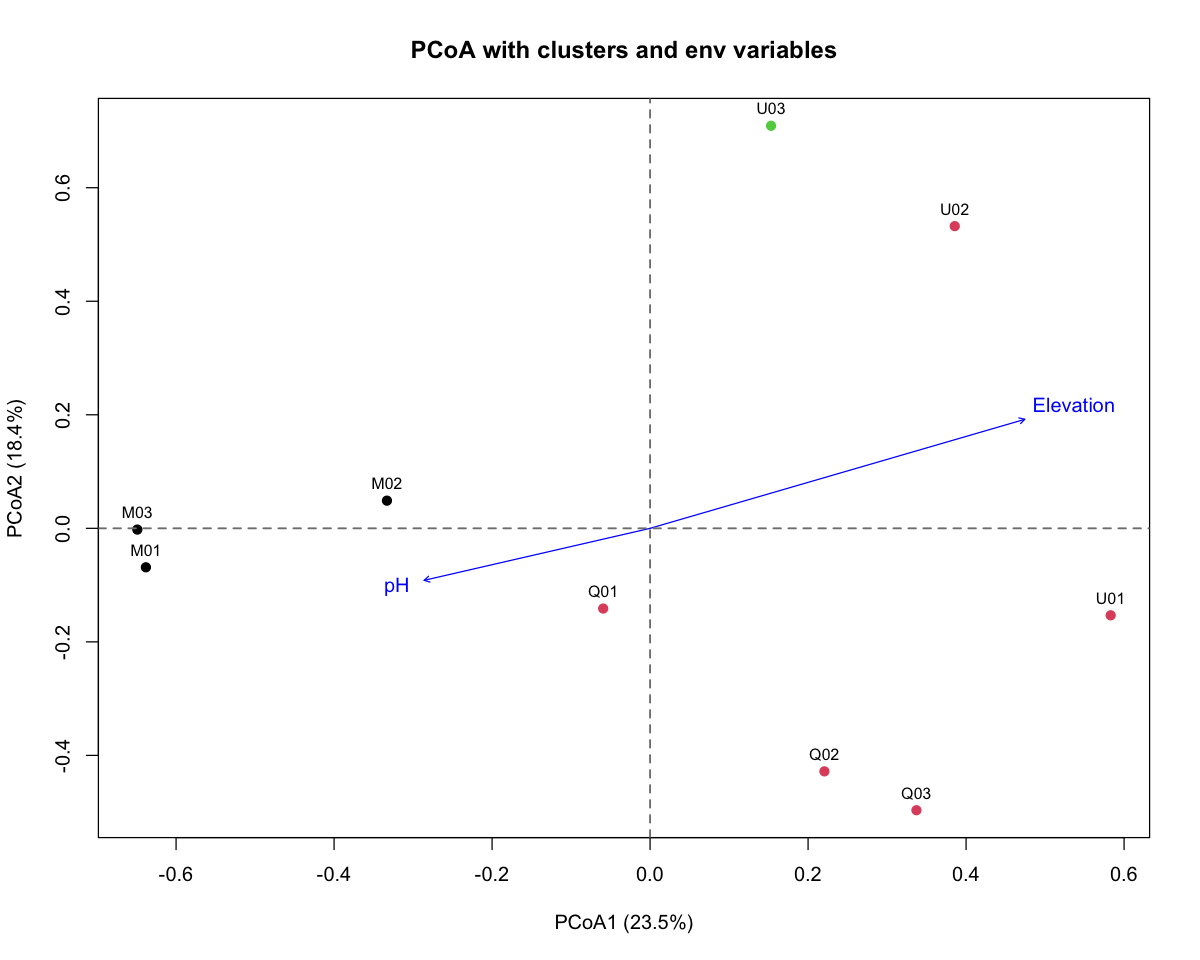

In [37]:
# Env
env_data <- env %>% column_to_rownames("site")

# Envfit
ef <- envfit(pcoa, env_data[, c("Elevation","pH")], permutations = 999)

# Plot PCoA with arrows
plot(pcoa_sites$PC1, pcoa_sites$PC2,
     col = pcoa_sites$cluster, pch=19,
     xlab = paste0("PCoA1 (", round(var_expl[1]*100,1), "%)"),
     ylab = paste0("PCoA2 (", round(var_expl[2]*100,1), "%)"),
     main = "PCoA with clusters and env variables")


text(pcoa_sites$PC1, pcoa_sites$PC2, labels=pcoa_sites$site, pos=3, cex=0.8)
plot(ef, add=TRUE, col="blue")
abline(h=0, v=0, col="gray50", lty=2, lwd=1.5)  # lignes pointillées grises

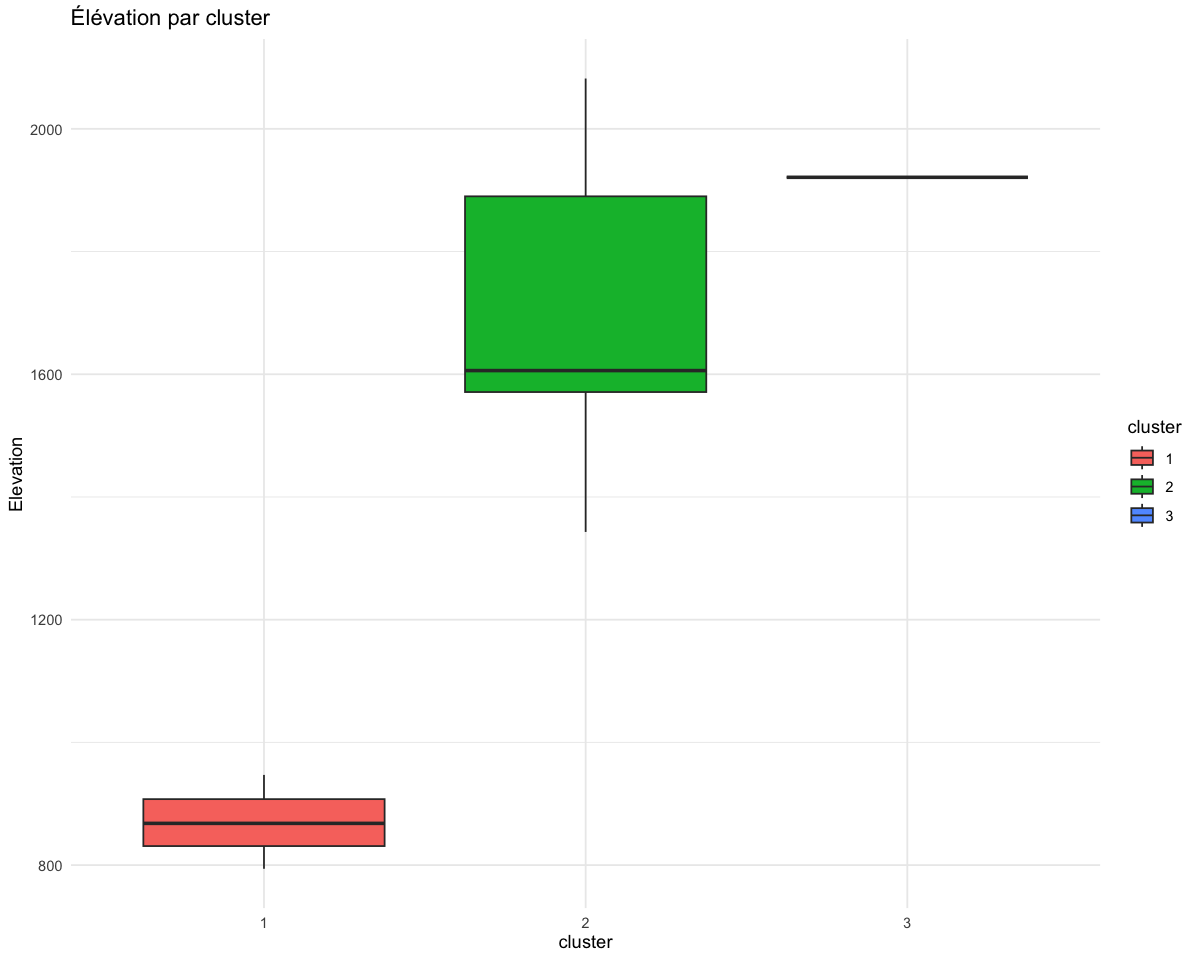

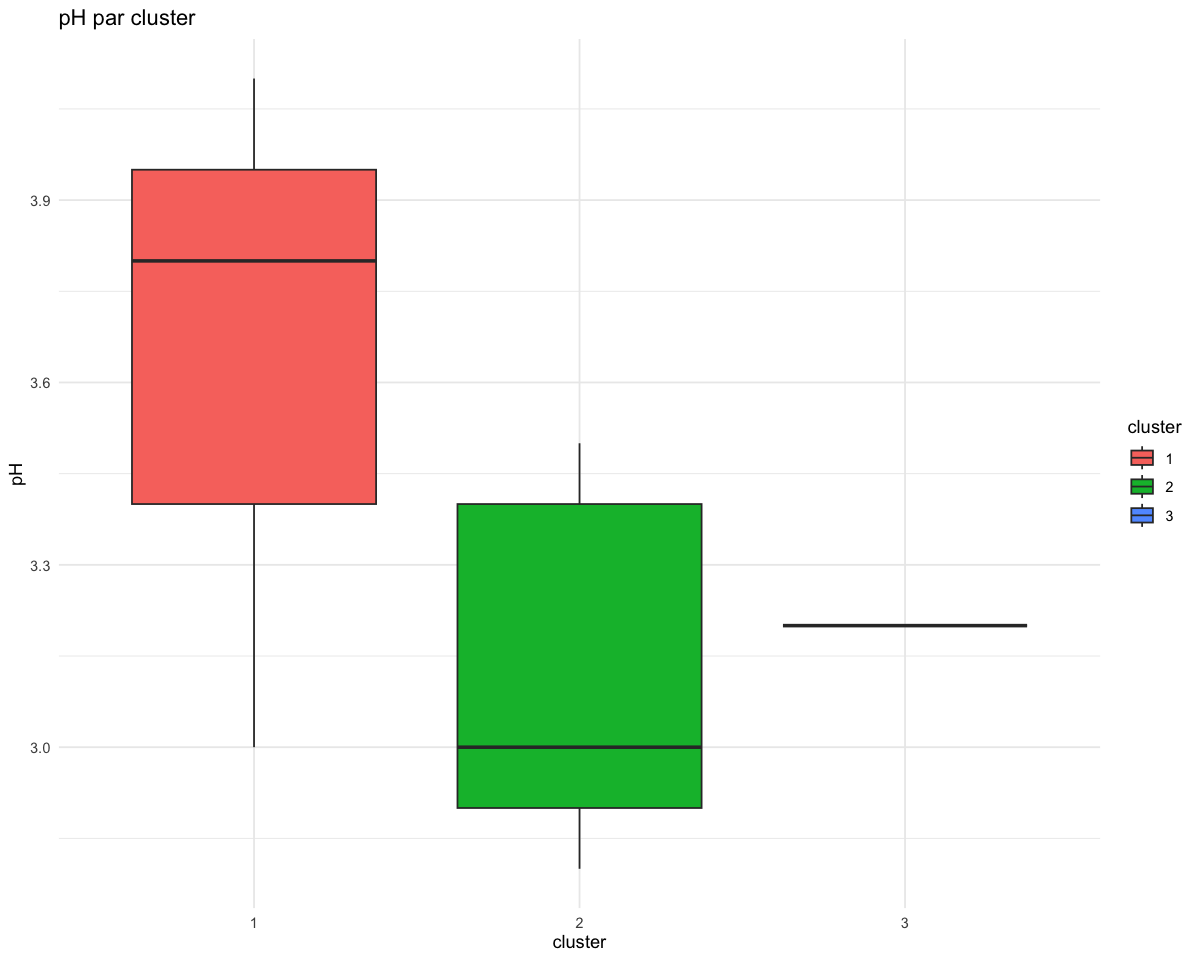

In [38]:
# Fusionn clusters et env
env_clusters <- merge(site_clusters, env, by="site")

# Boxplot for elevation
ggplot(env_clusters, aes(x=cluster, y=Elevation, fill=cluster)) +
  geom_boxplot() +
  ggtitle("Élévation par cluster") +
  theme_minimal()

# Boxplot for pH
ggplot(env_clusters, aes(x=cluster, y=pH, fill=cluster)) +
  geom_boxplot() +
  ggtitle("pH par cluster") +
  theme_minimal()